In [1]:
library(Seurat)
library(SeuratData)
library(patchwork)

Attaching SeuratObject

── Installed datasets ───────────────────────────────────── SeuratData v0.2.2 ──

✔ ifnb         3.1.0                    ✔ pbmc3k       3.1.4
✔ panc8        3.0.2                    ✔ pbmcMultiome 0.1.4


────────────────────────────────────── Key ─────────────────────────────────────

✔ Dataset loaded successfully
❯ Dataset built with a newer version of Seurat than installed
❓ Unknown version of Seurat installed




In [2]:
data("panc8")
pancreas.list <- SplitObject(panc8, split.by = "tech")
pancreas.list <- pancreas.list[c("celseq", "celseq2", "fluidigmc1", "smartseq2","indrop")]

In [3]:
for (i in 1:length(pancreas.list)) {
    pancreas.list[[i]] <- NormalizeData(pancreas.list[[i]], verbose = FALSE)
    pancreas.list[[i]] <- FindVariableFeatures(pancreas.list[[i]], selection.method = "vst", nfeatures = 2000,
        verbose = FALSE)
}

In [4]:
reference.list <- pancreas.list[c("celseq", "celseq2", "fluidigmc1", "smartseq2","indrop")]
pancreas.anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:30)

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 3451 anchors

Filtering anchors

	Retained 2774 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2150 anchors

Filtering anchors

	Retained 1852 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2776 anchors

Filtering anchors

	Retained 2490 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 3510 anchors

Filtering anchors

	Retained 2762 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6124 anchors

Filtering anchors

	Retained 4649 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2694 anchors

Filtering anchors

	Retained 1746 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4349 anchors


In [6]:
pancreas.integrated <- IntegrateData(anchorset = pancreas.anchors, dims = 1:30)

Merging dataset 3 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 2 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 into 2 3 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 3 1 4 into 5

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [41]:
sparse_matrix=pancreas.integrated$RNA@counts

dense_matrix=as.matrix(sparse_matrix)

write.csv(dense_matrix, file = "data/panc8/integration_matrix.csv")

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.8 GiB”


In [7]:
meta_data = pancreas.integrated@meta.data

write.csv(meta_data, file = "data/panc8/meta_data.csv")




Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


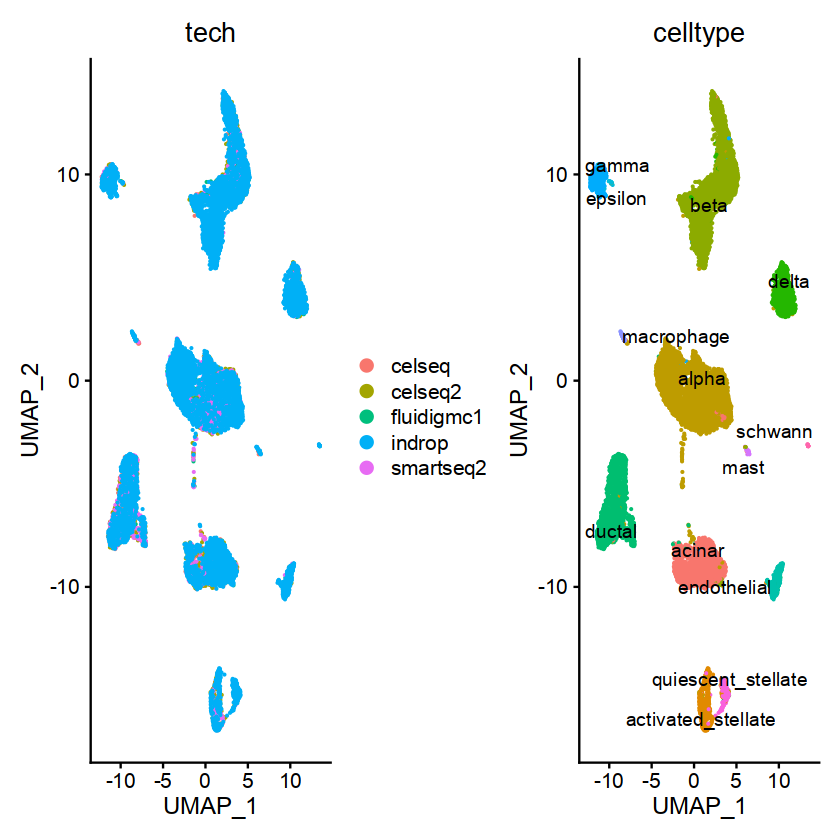

In [13]:
library(ggplot2)
library(cowplot)
library(patchwork)
# switch to integrated assay. The variable features of this assay are automatically set during
# IntegrateData
DefaultAssay(pancreas.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
pancreas.integrated <- ScaleData(pancreas.integrated, verbose = FALSE)

pancreas.integrated <- RunPCA(pancreas.integrated, npcs = 30, verbose = FALSE)
pancreas.integrated <- RunUMAP(pancreas.integrated, reduction = "pca", dims = 1:30, verbose = FALSE)
p1 <- DimPlot(pancreas.integrated, reduction = "umap", group.by = "tech")
p2 <- DimPlot(pancreas.integrated, reduction = "umap", group.by = "celltype", label = TRUE, repel = TRUE) +
    NoLegend()
p1 + p2

In [ ]:
embedding=pancreas.integrated@reductions$umap@cell.embeddings

write.csv(embedding,file = "data/panc8/embedding.csv")

In [ ]:
#python code

In [10]:
import pandas as pd

data = pd.read_csv("data/panc8/embedding.csv",index_col=0)
data.columns=["UMAP1","UMAP2"]

meta_data=pd.read_csv("data/panc8/meta_data.csv",index_col=0)

In [11]:
meta_data.head()

,orig.ident,nCount_RNA,nFeature_RNA,tech,replicate,assigned_cluster,celltype,dataset
D101_5,D101,4615.809692,1986,celseq,celseq,NaN,gamma,celseq
D101_7,D101,29001.562776,4209,celseq,celseq,NaN,acinar,celseq
D101_10,D101,6707.856549,2408,celseq,celseq,NaN,alpha,celseq
D101_13,D101,8797.223685,2964,celseq,celseq,NaN,delta,celseq
D101_14,D101,5032.557710,2264,celseq,celseq,NaN,beta,celseq


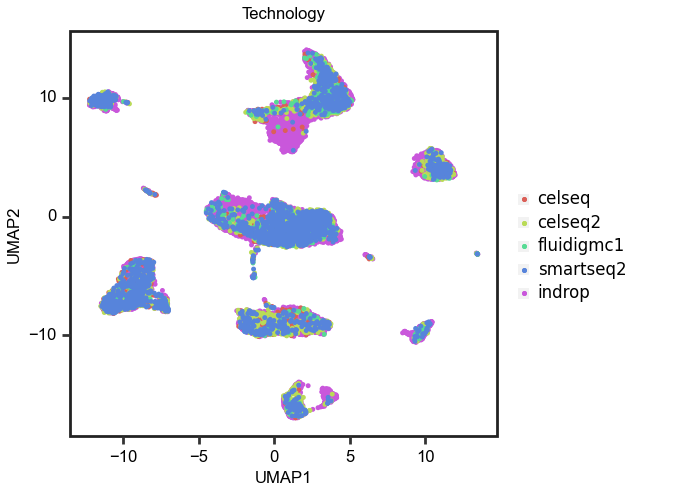

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.4 x 2.5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/panc8_tech_UMAP.pdf


In [26]:
#umap of total dataset




#UMAP pseudotime
from plotnine import *
import pandas as pd


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"



data = pd.read_csv("data/panc8/embedding.csv",index_col=0)
data.columns=["UMAP1","UMAP2"]

meta_data=pd.read_csv("data/panc8/meta_data.csv",index_col=0)


data["Technology"]=meta_data["tech"]
data["Cell type"]=meta_data["celltype"]


#select indrop
data_indrop=data[data["Technology"] == "indrop"]
meta_data_indrop=meta_data[data["Technology"] == "indrop"]

data_not_indrop=data[data["Technology"] != "indrop"]
meta_data_not_indrop=meta_data[data["Technology"] != "indrop"]

p =(ggplot()
    + geom_point(data_indrop, aes(x='UMAP1', y='UMAP2',color="factor(Technology)"),size=0.001,alpha=1)
    + geom_point(data_not_indrop, aes(x='UMAP1', y='UMAP2',color="factor(Technology)"),size=0.001,alpha=1)
    +theme(
        figure_size=[3.4,2.5],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.75,0.9), 
        legend_direction='vertical',
        #legend_position='right',
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("Technology")
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/panc8_tech_UMAP.pdf')


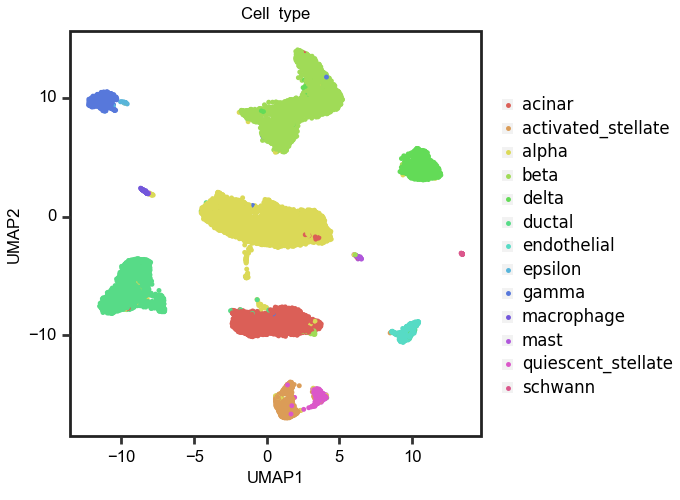

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.4 x 2.5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/panc8_cell_type_UMAP.pdf


In [27]:
#umap of total dataset




#UMAP pseudotime
from plotnine import *
import pandas as pd


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"



data = pd.read_csv("data/panc8/embedding.csv",index_col=0)
data.columns=["UMAP1","UMAP2"]

meta_data=pd.read_csv("data/panc8/meta_data.csv",index_col=0)


data["Technology"]=meta_data["tech"]
data["Celltype"]=meta_data["celltype"]




p =(ggplot()
    + geom_point(data, aes(x='UMAP1', y='UMAP2',color="factor(Celltype)"),size=0.001,alpha=1)

    +theme(
        figure_size=[3.4,2.5],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.75,0.9), 
        legend_direction='vertical',
        #legend_position='right',
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("Cell  type")
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/panc8_cell_type_UMAP.pdf')


In [12]:
#python code

import pandas as pd
import numpy as np

#read data

data = pd.read_csv("data/panc8/integration_matrix.csv", index_col=0)
meta_data = pd.read_csv("data/panc8/meta_data.csv", index_col=0)

data=data.T    #transpose to cell by gene


In [13]:
data

,A1BG-AS1,A1BG,A1CF,A2M-AS1,A2ML1,A2MP1,A2M,A4GALT,A4GNT,AAAS,...,USP17L1,UTAT33,WARS2-IT1,WASH6P,WASIR1,WASIR2,ZNF271P,ZNF638-IT1,ZRSR1,pk
D101_5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D101_7,0.0,0.0,3.017717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D101_10,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D101_13,0.0,0.0,3.017717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D101_14,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
human4_lib3.final_cell_0697,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human4_lib3.final_cell_0698,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human4_lib3.final_cell_0699,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
human4_lib3.final_cell_0700,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# split data by tech in meta_data

celseq = data[meta_data['tech']=='celseq']
celseq2 = data[meta_data['tech']=='celseq2']
fluidigmc1 = data[meta_data['tech']=='fluidigmc1']
smartseq2 = data[meta_data['tech']=='smartseq2']
indrop = data[meta_data['tech']=='indrop']



638


In [31]:
set(meta_data["celltype"].to_list())

{'acinar',
 'activated_stellate',
 'alpha',
 'beta',
 'delta',
 'ductal',
 'endothelial',
 'epsilon',
 'gamma',
 'macrophage',
 'mast',
 'quiescent_stellate',
 'schwann'}

In [15]:
data_sparse=data


#statistics of cells expressing each gene
gene_expressed_cell_number=data_sparse.astype(bool).sum(axis=0)

print(len(gene_expressed_cell_number))
#filter gene expressed in less than 10 cells
gene_expressed_cell_number=gene_expressed_cell_number[gene_expressed_cell_number>4000]
print(len(gene_expressed_cell_number))

data_rm_sparse=data_sparse[gene_expressed_cell_number.index.tolist()]
data_rm_sparse.shape           #10k cells, 4487 genes

34363
4822


(14890, 4822)

In [16]:
base_dir="data/panc8/"

In [17]:
import pickle
TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))

len(TF_gene_dict)

1209

In [18]:
#generate gene_to_TF_transform_matrix
import numpy as np
import pickle

TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))


gene_number=len(data_rm_sparse.columns.to_list())    

TF_number=len(TF_gene_dict)

gene_to_TF_transform_matrix=np.zeros((gene_number,TF_number))

TF_list=TF_gene_dict.keys()
for i,gene in enumerate(data_rm_sparse.columns):
    try:
        j=TF_list.index("gene")
        gene_to_TF_transform_matrix[i][j]=1
    except:
        pass
        
gene_to_TF_transform_matrix

pickle.dump(gene_to_TF_transform_matrix,open("%s/gene_to_TF_transform_matrix" %base_dir,"wb"))

In [19]:
#generate TF_mask

import numpy as np

gene_TF_dict=pickle.load(open("human/gene_TF_dict","rb"))

gene_number = len(data_rm_sparse.columns.to_list())    #6033
TF_number = len(TF_gene_dict)

TF_mask = np.zeros((gene_number,TF_number))
error_count=0

for i,gene_id in enumerate(data_rm_sparse.columns):

    for j,TF in enumerate(TF_gene_dict):
        if TF in gene_TF_dict.get(gene_id,[]):
            TF_mask[i][j]=1
        else:
            error_count+=1
        
print(error_count)
print(TF_mask)

pickle.dump(TF_mask,open("%s/TF_mask" %base_dir,"wb"))

3733310
[[0. 1. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [20]:
#generate GO_mask

GO_dict={}
with open("human/goa_human.gaf") as f:
    for line in f:
        if line[0] == "!":
            continue
        
        gene_id=line.split("\t")[2]
        GO_term=line.split("\t")[4]
        if GO_term not in GO_dict:
            GO_dict[GO_term]=[]
        GO_dict[GO_term].append(gene_id)


GO_list=[]
count=0
for item in GO_dict:
    if len(GO_dict[item])>=30:
        count+=1
        GO_list.append(item)
print(count)


gene_dict={}
with open("human/goa_human.gaf") as f:
    for line in f:
        if line[0]=="!":
            continue
        gene_id=line.split("\t")[2].upper()
        GO_term=line.split("\t")[4]
        if gene_id not in gene_dict:
            gene_dict[gene_id]=[]
        gene_dict[gene_id].append(GO_term)



gene_number=len(gene_expressed_cell_number.index.tolist())    #6033
GO_number=len(GO_list)  

GO_mask=np.zeros((gene_number,GO_number))
error_count=0

for i,gene_id in enumerate(data_rm_sparse.columns):

    for j,GO_term in enumerate(GO_list):
        if GO_term in gene_dict.get(gene_id,"GO:default"):

            GO_mask[i][j]=1
        else:
            error_count+=1
        
print(error_count)

pickle.dump(GO_mask,open("%s/GO_mask" %base_dir,"wb"))


1946
9320185


In [21]:
#generate GO_TF_mask

TF_number=len(TF_gene_dict)
GO_number=len(GO_list) 

GO_TF_mask=np.zeros((TF_number,GO_number))
error_count=0

for i,TF in enumerate(TF_gene_dict):
    for j,GO in enumerate(GO_list):
        if GO in gene_dict.get(TF,"GO:default"):
            GO_TF_mask[i][j]=1
        else:
            error_count+=1
print(error_count)
        
GO_TF_mask

pickle.dump(GO_TF_mask,open("%s/GO_TF_mask" %base_dir,"wb"))


2332169


In [59]:
#test on fluidigmc1

#GO_Net
import math
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split as ts

data_rm_sparse=data_rm_sparse

#data_rm_sparse.index=meta_data["celltype"].to_list()

###############################################################
gene_to_TF_transform_matrix=pickle.load(open("%s/gene_to_TF_transform_matrix" %base_dir,"rb"))
TF_mask=pickle.load(open("%s/TF_mask" %base_dir,"rb"))
GO_mask=pickle.load(open("%s/GO_mask" %base_dir,"rb"))
GO_TF_mask=pickle.load(open("%s/GO_TF_mask" %base_dir,"rb"))
###############################################################
#data_annotation = pd.read_csv('data/macparland/GSE115469_CellClusterType.txt', sep="\t")
#index_rename_dict = {key: value for key, value in zip(data_annotation['CellName'], data_annotation['CellType'])}
#$data_rm_sparse=data_rm_sparse.rename(index=index_rename_dict)

#normalize by row
#data_rm_sparse = data_rm_sparse.apply(lambda row: row / np.linalg.norm(row), axis=1)

#merge similar cell types
#data_rm_sparse.index = data_rm_sparse.index.str.replace('Hepatocyte_\d+', 'Hepatocyte', regex=True)
#data_rm_sparse.index = data_rm_sparse.index.str.replace('gamma-delta_T_Cells_\d+', 'gamma-delta_T_Cells', regex=True)


#filter low count cells
#data_rm_sparse = data_rm_sparse[data_rm_sparse.index != 'Hepatic_Stellate_Cells']


#novel_cell_type = ['Plasma_Cells']

#data_rm_sparse_novel = data_rm_sparse[data_rm_sparse.index.isin(novel_cell_type)]
#data_rm_sparse_rest = data_rm_sparse[~data_rm_sparse.index.isin(novel_cell_type)]




classes=[]
for celltype in meta_data["celltype"]:
    if celltype not in classes:
        classes.append(celltype)
#print(len(classes),classes)


label_dict_revese={}
label_dict={}
for i,celltype in enumerate(classes):
    label_dict[celltype]=i
    label_dict_revese[i]=celltype
label_dict
################################################################



def gen_mask(row,col,percent=0.5,num_zeros=None):
    if num_zeros is None:
        #Total number being masked is 0.5 by default
        num_zeros=int((row*col)*percent)
    
    mask=np.hstack([np.zeros(num_zeros),np.ones(row*col-num_zeros)])
    np.random.shuffle(mask)
    return mask.reshape(row,col)

class LinearFunction(torch.autograd.Function):
    """
    autograd function which masks it's weights by 'mask'.
    """
    
    #Not that both forward and backword are @staticmethod

    
    #bias, mask is an optional argument
    @staticmethod
    def forward(ctx, input, weight, bias=None, mask=None):
        if mask is not None:
            #change weight to 0 where mask == 0

            weight=weight*mask
 
        output=input.mm(weight.t())

        if bias is not None:
            output+=bias.unsqueeze(0).expand_as(output)
        
        ctx.save_for_backward(input, weight, bias, mask)

        return output
    
    #This function has noly a single output, so it gets only one gradient
    @staticmethod
    def backward(ctx,grad_output):
        input,weight,bias,mask = ctx.saved_tensors
        grad_input=grad_weight=grad_bias=grad_mask=None
        
        #These meeds_input_grad checks are optional and there only to improve efficiency.
        #If you want to make your code simpler, you can skip them. Returning gradients for
        #inputs that don't require it is not an error.
        if ctx.needs_input_grad[0]:
            grad_input=grad_output.mm(weight)
        
        if ctx.needs_input_grad[1]:
            grad_weight=grad_output.t().mm(input)
            
            if mask is not None:
                
                #change grad_weight to 0 where mask == 0
                grad_weight=grad_weight*mask

        
        #if bias is not None and ctx.need_input_grad[2]:
        if ctx.needs_input_grad[2]:
            grad_bias=grad_output.sum(0).squeeze(0)
        
        return grad_input,grad_weight,grad_bias,grad_mask
    

       
class CustomizedLinear(nn.Module):
    def __init__(self,input_features,output_features, bias=None, mask=None):
        """
        Arguments
        mask [numpy array]:
            The shape is (n_input_fearues,n_output_features).
            The elements are 0 or 1 which delcare un-connected or connected.
            
        bias [bool]:
            flg of bias.
        """
        super(CustomizedLinear,self).__init__()
        self.input_features=input_features
        self.out_features=output_features
        
        #nn.Parameter is a spetial kind of Tensor, that will get
        #automatically registered as Module's parameter once it's assigned
        #as an attribute
        self.weight=nn.Parameter(torch.Tensor(self.out_features,self.input_features))
        
        if bias:

            self.bias=nn.Parameter(torch.Tensor(self.out_features))
        else:
            #You should always register all possible parameters, but the
            #optinal ones can be None if you want.
            self.register_parameter("bias",None)
            
        #Initialize the above parameters (weight and bias). Important!
        self.init_params()
        
        #mask should be registered after weight and bias
        if mask is not None:
            mask=torch.tensor(mask,dtype=torch.float).t()
            self.mask=nn.Parameter(mask,requires_grad=False)
        else:
            self.register_parameter("mask",None)

        
    def init_params(self):
        stdv=1./math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv,stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv,stdv)
                
    def forward(self,input):
        #See the autograd section for explanation of what happens here.
        
        output=LinearFunction.apply(input,self.weight,self.bias,self.mask)
        
        return output
        
    def extra_repr(self):
        #(Optional) Set the extra informatioin about this module. You can test
        #it by printing an object of this class.
        return "input_features={}, output_features={}, bias={}, mask={}".format(
            self.input_features, self.out_features,
            self.bias is not None, self.mask is not None)
        
        
class GO_Net(nn.Module):
    def __init__(self,in_size,out_size,ratio=[0.006525,0,0]):
        super(GO_Net,self).__init__()

        self.gene_number=len(gene_expressed_cell_number.index.tolist())    #6033
        self.TF_number=1209
        self.GO_number=len(GO_list)
        self.class_number=3

        self.gene_to_TF_transform_matrix=torch.tensor(gene_to_TF_transform_matrix,dtype=torch.float32)
    
        
        self.bn0=nn.BatchNorm1d(self.gene_number)
        #self.fc1=CustomizedLinear(in_size,2290,mask=gen_mask(3443,2290,ratio[0]))  
        #self.fc1=CustomizedLinear(in_size,1946,mask=gen_mask(2903,1946,ratio[0]))        
        self.fc1=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        self.gene_to_GO_layer=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        #self.fc1=CustomizedLinear(in_size,2290,mask=np.ones((3443,2290)))
    
        self.bn1=nn.BatchNorm1d(self.GO_number)
                
        self.fc2=CustomizedLinear(self.GO_number,out_size,mask=gen_mask(self.GO_number,out_size,ratio[1]))
        self.bn2=nn.BatchNorm1d(out_size)

        self.gene_to_TF_layer=CustomizedLinear(self.gene_number,self.TF_number,mask=TF_mask)
        self.TF_to_GO_layer=CustomizedLinear(self.TF_number,self.GO_number,mask=GO_TF_mask)
        
        self.fc3=CustomizedLinear(100,100,mask=gen_mask(100,100,ratio[1]))

        self.fc4=CustomizedLinear(100,out_size,mask=gen_mask(100,out_size,ratio[1]))
        
        self.relu=nn.ReLU()
        self.leaky_relu=nn.LeakyReLU()
        #self.dropout = nn.Dropout(0.1)
        for module in self.modules():
            if isinstance(module,nn.Linear):
                nn.init.uniform_(module.weight,a=0,b=1)
            elif isinstance(module,(nn.BatchNorm1d,nn.GroupNorm)):
                nn.init.constant_(module.weight,1)
                nn.init.constant_(module.bias,0)

                        
    def forward(self,x):

        #x=self.bn0(x)
        TF_residul=torch.matmul(x,self.gene_to_TF_transform_matrix)

        TF_derived_from_gene=self.gene_to_TF_layer(x)

        TF_sum=TF_residul+TF_derived_from_gene
        #TF_sum=TF_derived_from_gene

        GO_derived_from_TF=self.TF_to_GO_layer(TF_sum)

        GO_derived_from_gene=self.gene_to_GO_layer(x)

        GO_sum=GO_derived_from_TF+GO_derived_from_gene

        #x=self.bn0(x)
        #x=self.fc1(x)
        #x=self.bn1(x)
        #x=self.relu(x)
        #x=self.dropout(x)
        GO_sum=self.leaky_relu(GO_sum)

        #x=torch.tanh(x) 
        #print(161,self.fc1.weight)
        x=self.fc2(GO_sum)
        #x=self.bn2(x)
        #x=self.relu(x)
        #x=self.leaky_relu(x)
        #x=self.fc3(x)
        #x=self.leaky_relu(x)
        #x=self.fc4(x)
 
        return x,GO_sum,TF_derived_from_gene,GO_derived_from_TF

"""
class Reconstraction(nn.Module):
    def __init__(self,in_size,out_size):
        super(Reconstraction,self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(in_size, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 1000),
            nn.LeakyReLU(True),
            nn.Linear(1000, out_size)
        )

    def forward(self, x):
        x = self.decoder(x)
        return x
"""     


 
class MyDataset(Dataset):
    def __init__(self, x,y):
        self.x=x
        self.y=y

    def __getitem__(self, index):
        features = self.x[index]
        label = self.y[index]
        return features, label

    def __len__(self):
        return len(self.x)

def accuracy_score(y_test,y_pred):
    t=0
    f=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            t+=1
        else:
            f+=1
    return(t/(t+f))



from torch.utils.data import WeightedRandomSampler

def make_weights_for_balanced_classes(dataset, nclasses):
    count = [0] * nclasses
    for item in dataset:
        count[item[1]] += 1
    weight_per_class = [0.] * nclasses
    N = float(sum(count))
    for i in range(nclasses):
        weight_per_class[i] = N/float(count[i])
    weight = [0] * len(dataset)
    for idx, val in enumerate(dataset):
        weight[idx] = weight_per_class[val[1]]
    return weight


class CustomWeightedRandomSampler(WeightedRandomSampler):
    """WeightedRandomSampler except allows for more than 2^24 samples to be sampled"""
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __iter__(self):
        rand_tensor = np.random.choice(range(0, len(self.weights)),
                                       size=self.num_samples,
                                       p=self.weights.numpy() / torch.sum(self.weights).numpy(),
                                       replace=self.replacement)
        rand_tensor = torch.from_numpy(rand_tensor)
        return iter(rand_tensor.tolist())





#training
input_size = len(data_rm_sparse.columns)
output_size = len(classes)

learning_rate = 0.1
epochs = 3


#reconstraction_optimizer = optim.Adam(reconstraction_model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
#reconstraction_criterion = nn.MSELoss()



data_train_x=data_rm_sparse
data_train_y=meta_data["celltype"]


#5-fold cross validation
import numpy as np



#define model and optimizer
model = GO_Net(input_size, output_size,ratio=[0,0,0])
optimizer = optim.Adam(model.parameters(), lr=0.001)


"""
celseq = data[meta_data['tech']=='celseq']
celseq2 = data[meta_data['tech']=='celseq2']
fluidigmc1 = data[meta_data['tech']=='fluidigmc1']
smartseq2 = data[meta_data['tech']=='smartseq2']
indrop = data[meta_data['tech']=='indrop']

"""



# Subset data and annotation based on indices
x_train = data_train_x[meta_data['tech'] != 'fluidigmc1'].to_numpy()
y_train = meta_data[meta_data["tech"] != 'fluidigmc1']["celltype"]
    
x_test = data_train_x[meta_data['tech'] == 'fluidigmc1'].to_numpy()
y_test = meta_data[meta_data["tech"] == 'fluidigmc1']["celltype"]

# Continue with your operations on data_train, anno_train, data_test, and anno_test




#x_train,x_test,y_train,y_test = ts(data_train_x.to_numpy(),data_train_y.to_numpy(),test_size=0.2,random_state=1, shuffle=True)

#x_train=x_train[0:400]
#y_train=y_train[0:400]

#label_dict={25:0,26:1,27:2,33:3,34:4}
y_train_relabeled=[label_dict[label] for label in y_train]
y_test_relabeled=[label_dict[label] for label in y_test]


#train_size=20000

#x_train=x_train[0:train_size]
#y_train_relabeled=y_train_relabeled[0:train_size]

train_data=MyDataset(x_train,y_train_relabeled)



#for unbalanced data
"""
weights=make_weights_for_balanced_classes(train_data,len(classes))
weights = torch.DoubleTensor(weights)
sampler = CustomWeightedRandomSampler(weights, len(weights))        #sampler for imbalanced classes
"""

#train_loader=DataLoader(train_data, batch_size=60, sampler=sampler)
train_loader=DataLoader(train_data, batch_size=60, shuffle=True)

num_epochs=15
# 训练模型
for epoch in range(num_epochs):
    running_loss = 0.0
    reconstraction_running_loss = 0.0

    for i, batch in enumerate(train_loader, 0):
        inputs, labels = batch
        #print(labels)
        inputs=Variable(inputs).to(torch.float32)
        labels=Variable(labels).to(torch.long)
        # 将梯度缓存清零
        optimizer.zero_grad()

        # 前向传播、计算损失和反向传播
        outputs,_,_,_ = model(inputs)

        loss = criterion(outputs, labels)

        #reconstraction_input=reconstraction_model(outputs)
        #reconstraction_loss = reconstraction_criterion(reconstraction_input, inputs)

        #reconstraction_optimizer.zero_grad()

        #combined_loss=loss+reconstraction_loss
        #combined_loss.backward()
        loss.backward()
        
        optimizer.step()
        #reconstraction_optimizer.step()


        #reconstraction_running_loss += reconstraction_loss.item()
        running_loss += loss.item()

        if i % 40 == 0:
            pass
            #print(i)
            #print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            
        if i>400:
            break

    test_data=MyDataset(x_test,y_test_relabeled)
    test_loader=DataLoader(test_data, batch_size=32, shuffle=False)
    result=[]
    for i, batch in enumerate(test_loader):
        inputs, labels = batch
            
        inputs=Variable(inputs).to(torch.float32)

        labels=Variable(labels).to(torch.long)
            
        outputs,_,_,_ = model(inputs)
        pred = list(torch.max(outputs, 1)[1].numpy())
        result.extend(pred)
        #print(pred,labels)
        if i>100:
            break
    accuracy = accuracy_score(y_test_relabeled[0:len(result)],result)
    #f1_score = calculate_multiclass_f1_score(y_test_relabeled[0:len(result)],result)
                #########
    print("epoch %s" %(epoch),"\taccuracy:\t",accuracy,"\tloss:\t",running_loss / len(train_loader) )
        
    #save model
    #pickle.dump(model,open("model/GO_heart.model","wb"))
        
        


epoch 0 	accuracy:	 0.9090909090909091 	loss:	 1.3017424282719607
epoch 1 	accuracy:	 0.9545454545454546 	loss:	 0.8297279924545594
epoch 2 	accuracy:	 0.9435736677115988 	loss:	 0.4490039634573109
epoch 3 	accuracy:	 0.9608150470219435 	loss:	 0.3901895561916832
epoch 4 	accuracy:	 0.9263322884012539 	loss:	 0.3554666216070412
epoch 5 	accuracy:	 0.9545454545454546 	loss:	 0.49422253257821963


KeyboardInterrupt: 

/tmp/ipykernel_55243/3127470243.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


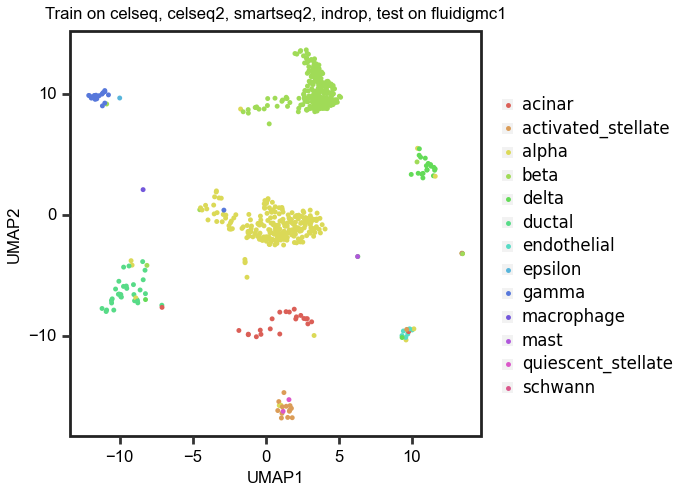

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.4 x 2.5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/panc8_cell_type_fluidigmc1_UMAP.pdf


In [60]:
test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=32, shuffle=False)
result=[]
for i, batch in enumerate(test_loader):
    inputs, labels = batch
            
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
            
    outputs,_,_,_ = model(inputs)
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)
    #print(pred,labels)

#umap of total dataset


result=[label_dict_revese[label] for label in result]

#UMAP pseudotime
from plotnine import *
import pandas as pd


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"



data = pd.read_csv("data/panc8/embedding.csv",index_col=0)
data.columns=["UMAP1","UMAP2"]

meta_data=pd.read_csv("data/panc8/meta_data.csv",index_col=0)


data["Technology"]=meta_data["tech"]
data["Cell type"]=meta_data["celltype"]


#select indrop
data_fluidigmc1=data[data["Technology"] == "fluidigmc1"]
meta_data_fluidigmc1=meta_data[data["Technology"] == "fluidigmc1"]
data_fluidigmc1["celltype"]=result


p =(ggplot()
    + geom_point(data_fluidigmc1, aes(x='UMAP1', y='UMAP2',color="factor(celltype)"),size=0.001,alpha=1)

    +theme(
        figure_size=[3.4,2.5],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.75,0.9), 
        legend_direction='vertical',
        #legend_position='right',
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("Train on celseq, celseq2, smartseq2, indrop, test on fluidigmc1")
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/panc8_cell_type_fluidigmc1_UMAP.pdf')


In [53]:
#test on cellseq

#GO_Net
import math
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split as ts

data_rm_sparse=data_rm_sparse

#data_rm_sparse.index=meta_data["celltype"].to_list()

###############################################################
gene_to_TF_transform_matrix=pickle.load(open("%s/gene_to_TF_transform_matrix" %base_dir,"rb"))
TF_mask=pickle.load(open("%s/TF_mask" %base_dir,"rb"))
GO_mask=pickle.load(open("%s/GO_mask" %base_dir,"rb"))
GO_TF_mask=pickle.load(open("%s/GO_TF_mask" %base_dir,"rb"))
###############################################################
#data_annotation = pd.read_csv('data/macparland/GSE115469_CellClusterType.txt', sep="\t")
#index_rename_dict = {key: value for key, value in zip(data_annotation['CellName'], data_annotation['CellType'])}
#$data_rm_sparse=data_rm_sparse.rename(index=index_rename_dict)

#normalize by row
#data_rm_sparse = data_rm_sparse.apply(lambda row: row / np.linalg.norm(row), axis=1)

#merge similar cell types
#data_rm_sparse.index = data_rm_sparse.index.str.replace('Hepatocyte_\d+', 'Hepatocyte', regex=True)
#data_rm_sparse.index = data_rm_sparse.index.str.replace('gamma-delta_T_Cells_\d+', 'gamma-delta_T_Cells', regex=True)


#filter low count cells
#data_rm_sparse = data_rm_sparse[data_rm_sparse.index != 'Hepatic_Stellate_Cells']


#novel_cell_type = ['Plasma_Cells']

#data_rm_sparse_novel = data_rm_sparse[data_rm_sparse.index.isin(novel_cell_type)]
#data_rm_sparse_rest = data_rm_sparse[~data_rm_sparse.index.isin(novel_cell_type)]




classes=[]
for celltype in meta_data["celltype"]:
    if celltype not in classes:
        classes.append(celltype)
#print(len(classes),classes)


label_dict_revese={}
label_dict={}
for i,celltype in enumerate(classes):
    label_dict[celltype]=i
    label_dict_revese[i]=celltype
label_dict
################################################################



def gen_mask(row,col,percent=0.5,num_zeros=None):
    if num_zeros is None:
        #Total number being masked is 0.5 by default
        num_zeros=int((row*col)*percent)
    
    mask=np.hstack([np.zeros(num_zeros),np.ones(row*col-num_zeros)])
    np.random.shuffle(mask)
    return mask.reshape(row,col)

class LinearFunction(torch.autograd.Function):
    """
    autograd function which masks it's weights by 'mask'.
    """
    
    #Not that both forward and backword are @staticmethod

    
    #bias, mask is an optional argument
    @staticmethod
    def forward(ctx, input, weight, bias=None, mask=None):
        if mask is not None:
            #change weight to 0 where mask == 0

            weight=weight*mask
 
        output=input.mm(weight.t())

        if bias is not None:
            output+=bias.unsqueeze(0).expand_as(output)
        
        ctx.save_for_backward(input, weight, bias, mask)

        return output
    
    #This function has noly a single output, so it gets only one gradient
    @staticmethod
    def backward(ctx,grad_output):
        input,weight,bias,mask = ctx.saved_tensors
        grad_input=grad_weight=grad_bias=grad_mask=None
        
        #These meeds_input_grad checks are optional and there only to improve efficiency.
        #If you want to make your code simpler, you can skip them. Returning gradients for
        #inputs that don't require it is not an error.
        if ctx.needs_input_grad[0]:
            grad_input=grad_output.mm(weight)
        
        if ctx.needs_input_grad[1]:
            grad_weight=grad_output.t().mm(input)
            
            if mask is not None:
                
                #change grad_weight to 0 where mask == 0
                grad_weight=grad_weight*mask

        
        #if bias is not None and ctx.need_input_grad[2]:
        if ctx.needs_input_grad[2]:
            grad_bias=grad_output.sum(0).squeeze(0)
        
        return grad_input,grad_weight,grad_bias,grad_mask
    

       
class CustomizedLinear(nn.Module):
    def __init__(self,input_features,output_features, bias=None, mask=None):
        """
        Arguments
        mask [numpy array]:
            The shape is (n_input_fearues,n_output_features).
            The elements are 0 or 1 which delcare un-connected or connected.
            
        bias [bool]:
            flg of bias.
        """
        super(CustomizedLinear,self).__init__()
        self.input_features=input_features
        self.out_features=output_features
        
        #nn.Parameter is a spetial kind of Tensor, that will get
        #automatically registered as Module's parameter once it's assigned
        #as an attribute
        self.weight=nn.Parameter(torch.Tensor(self.out_features,self.input_features))
        
        if bias:

            self.bias=nn.Parameter(torch.Tensor(self.out_features))
        else:
            #You should always register all possible parameters, but the
            #optinal ones can be None if you want.
            self.register_parameter("bias",None)
            
        #Initialize the above parameters (weight and bias). Important!
        self.init_params()
        
        #mask should be registered after weight and bias
        if mask is not None:
            mask=torch.tensor(mask,dtype=torch.float).t()
            self.mask=nn.Parameter(mask,requires_grad=False)
        else:
            self.register_parameter("mask",None)

        
    def init_params(self):
        stdv=1./math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv,stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv,stdv)
                
    def forward(self,input):
        #See the autograd section for explanation of what happens here.
        
        output=LinearFunction.apply(input,self.weight,self.bias,self.mask)
        
        return output
        
    def extra_repr(self):
        #(Optional) Set the extra informatioin about this module. You can test
        #it by printing an object of this class.
        return "input_features={}, output_features={}, bias={}, mask={}".format(
            self.input_features, self.out_features,
            self.bias is not None, self.mask is not None)
        
        
class GO_Net(nn.Module):
    def __init__(self,in_size,out_size,ratio=[0.006525,0,0]):
        super(GO_Net,self).__init__()

        self.gene_number=len(gene_expressed_cell_number.index.tolist())    #6033
        self.TF_number=1209
        self.GO_number=len(GO_list)
        self.class_number=3

        self.gene_to_TF_transform_matrix=torch.tensor(gene_to_TF_transform_matrix,dtype=torch.float32)
    
        
        self.bn0=nn.BatchNorm1d(self.gene_number)
        #self.fc1=CustomizedLinear(in_size,2290,mask=gen_mask(3443,2290,ratio[0]))  
        #self.fc1=CustomizedLinear(in_size,1946,mask=gen_mask(2903,1946,ratio[0]))        
        self.fc1=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        self.gene_to_GO_layer=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        #self.fc1=CustomizedLinear(in_size,2290,mask=np.ones((3443,2290)))
    
        self.bn1=nn.BatchNorm1d(self.GO_number)
                
        self.fc2=CustomizedLinear(self.GO_number,out_size,mask=gen_mask(self.GO_number,out_size,ratio[1]))
        self.bn2=nn.BatchNorm1d(out_size)

        self.gene_to_TF_layer=CustomizedLinear(self.gene_number,self.TF_number,mask=TF_mask)
        self.TF_to_GO_layer=CustomizedLinear(self.TF_number,self.GO_number,mask=GO_TF_mask)
        
        self.fc3=CustomizedLinear(100,100,mask=gen_mask(100,100,ratio[1]))

        self.fc4=CustomizedLinear(100,out_size,mask=gen_mask(100,out_size,ratio[1]))
        
        self.relu=nn.ReLU()
        self.leaky_relu=nn.LeakyReLU()
        #self.dropout = nn.Dropout(0.1)
        for module in self.modules():
            if isinstance(module,nn.Linear):
                nn.init.uniform_(module.weight,a=0,b=1)
            elif isinstance(module,(nn.BatchNorm1d,nn.GroupNorm)):
                nn.init.constant_(module.weight,1)
                nn.init.constant_(module.bias,0)

                        
    def forward(self,x):

        #x=self.bn0(x)
        TF_residul=torch.matmul(x,self.gene_to_TF_transform_matrix)

        TF_derived_from_gene=self.gene_to_TF_layer(x)

        TF_sum=TF_residul+TF_derived_from_gene
        #TF_sum=TF_derived_from_gene

        GO_derived_from_TF=self.TF_to_GO_layer(TF_sum)

        GO_derived_from_gene=self.gene_to_GO_layer(x)

        GO_sum=GO_derived_from_TF+GO_derived_from_gene

        #x=self.bn0(x)
        #x=self.fc1(x)
        #x=self.bn1(x)
        #x=self.relu(x)
        #x=self.dropout(x)
        GO_sum=self.leaky_relu(GO_sum)

        #x=torch.tanh(x) 
        #print(161,self.fc1.weight)
        x=self.fc2(GO_sum)
        #x=self.bn2(x)
        #x=self.relu(x)
        #x=self.leaky_relu(x)
        #x=self.fc3(x)
        #x=self.leaky_relu(x)
        #x=self.fc4(x)
 
        return x,GO_sum,TF_derived_from_gene,GO_derived_from_TF

"""
class Reconstraction(nn.Module):
    def __init__(self,in_size,out_size):
        super(Reconstraction,self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(in_size, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 1000),
            nn.LeakyReLU(True),
            nn.Linear(1000, out_size)
        )

    def forward(self, x):
        x = self.decoder(x)
        return x
"""     


 
class MyDataset(Dataset):
    def __init__(self, x,y):
        self.x=x
        self.y=y

    def __getitem__(self, index):
        features = self.x[index]
        label = self.y[index]
        return features, label

    def __len__(self):
        return len(self.x)

def accuracy_score(y_test,y_pred):
    t=0
    f=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            t+=1
        else:
            f+=1
    return(t/(t+f))



from torch.utils.data import WeightedRandomSampler

def make_weights_for_balanced_classes(dataset, nclasses):
    count = [0] * nclasses
    for item in dataset:
        count[item[1]] += 1
    weight_per_class = [0.] * nclasses
    N = float(sum(count))
    for i in range(nclasses):
        weight_per_class[i] = N/float(count[i])
    weight = [0] * len(dataset)
    for idx, val in enumerate(dataset):
        weight[idx] = weight_per_class[val[1]]
    return weight


class CustomWeightedRandomSampler(WeightedRandomSampler):
    """WeightedRandomSampler except allows for more than 2^24 samples to be sampled"""
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __iter__(self):
        rand_tensor = np.random.choice(range(0, len(self.weights)),
                                       size=self.num_samples,
                                       p=self.weights.numpy() / torch.sum(self.weights).numpy(),
                                       replace=self.replacement)
        rand_tensor = torch.from_numpy(rand_tensor)
        return iter(rand_tensor.tolist())





#training
input_size = len(data_rm_sparse.columns)
output_size = len(classes)

learning_rate = 0.1
epochs = 3


#reconstraction_optimizer = optim.Adam(reconstraction_model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
#reconstraction_criterion = nn.MSELoss()



data_train_x=data_rm_sparse
data_train_y=meta_data["celltype"]


#5-fold cross validation
import numpy as np



#define model and optimizer
model = GO_Net(input_size, output_size,ratio=[0,0,0])
optimizer = optim.Adam(model.parameters(), lr=0.001)


"""
celseq = data[meta_data['tech']=='celseq']
celseq2 = data[meta_data['tech']=='celseq2']
fluidigmc1 = data[meta_data['tech']=='fluidigmc1']
smartseq2 = data[meta_data['tech']=='smartseq2']
indrop = data[meta_data['tech']=='indrop']

"""



# Subset data and annotation based on indices
x_train = data_train_x[meta_data['tech'] != 'celseq'].to_numpy()
y_train = meta_data[meta_data["tech"] != 'celseq']["celltype"]
    
x_test = data_train_x[meta_data['tech'] == 'celseq'].to_numpy()
y_test = meta_data[meta_data["tech"] == 'celseq']["celltype"]

# Continue with your operations on data_train, anno_train, data_test, and anno_test




#x_train,x_test,y_train,y_test = ts(data_train_x.to_numpy(),data_train_y.to_numpy(),test_size=0.2,random_state=1, shuffle=True)

#x_train=x_train[0:400]
#y_train=y_train[0:400]

#label_dict={25:0,26:1,27:2,33:3,34:4}
y_train_relabeled=[label_dict[label] for label in y_train]
y_test_relabeled=[label_dict[label] for label in y_test]


#train_size=20000

#x_train=x_train[0:train_size]
#y_train_relabeled=y_train_relabeled[0:train_size]

train_data=MyDataset(x_train,y_train_relabeled)



#for unbalanced data
"""
weights=make_weights_for_balanced_classes(train_data,len(classes))
weights = torch.DoubleTensor(weights)
sampler = CustomWeightedRandomSampler(weights, len(weights))        #sampler for imbalanced classes
"""

#train_loader=DataLoader(train_data, batch_size=60, sampler=sampler)
train_loader=DataLoader(train_data, batch_size=60, shuffle=True)

num_epochs=15
# 训练模型
for epoch in range(num_epochs):
    running_loss = 0.0
    reconstraction_running_loss = 0.0

    for i, batch in enumerate(train_loader, 0):
        inputs, labels = batch
        #print(labels)
        inputs=Variable(inputs).to(torch.float32)
        labels=Variable(labels).to(torch.long)
        # 将梯度缓存清零
        optimizer.zero_grad()

        # 前向传播、计算损失和反向传播
        outputs,_,_,_ = model(inputs)

        loss = criterion(outputs, labels)

        #reconstraction_input=reconstraction_model(outputs)
        #reconstraction_loss = reconstraction_criterion(reconstraction_input, inputs)

        #reconstraction_optimizer.zero_grad()

        #combined_loss=loss+reconstraction_loss
        #combined_loss.backward()
        loss.backward()
        
        optimizer.step()
        #reconstraction_optimizer.step()


        #reconstraction_running_loss += reconstraction_loss.item()
        running_loss += loss.item()

        if i % 40 == 0:
            pass
            #print(i)
            #print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            
        if i>400:
            break

    test_data=MyDataset(x_test,y_test_relabeled)
    test_loader=DataLoader(test_data, batch_size=32, shuffle=False)
    result=[]
    for i, batch in enumerate(test_loader):
        inputs, labels = batch
            
        inputs=Variable(inputs).to(torch.float32)

        labels=Variable(labels).to(torch.long)
            
        outputs,_,_,_ = model(inputs)
        pred = list(torch.max(outputs, 1)[1].numpy())
        result.extend(pred)
        #print(pred,labels)
        if i>100:
            break
    accuracy = accuracy_score(y_test_relabeled[0:len(result)],result)
    #f1_score = calculate_multiclass_f1_score(y_test_relabeled[0:len(result)],result)
                #########
    print("epoch %s" %(epoch),"\taccuracy:\t",accuracy,"\tloss:\t",running_loss / len(train_loader) )
        
    #save model
    #pickle.dump(model,open("model/GO_heart.model","wb"))
        
        


epoch 0 	accuracy:	 0.9382470119521913 	loss:	 2.2940011692458184
epoch 1 	accuracy:	 0.9203187250996016 	loss:	 0.8044137248833632
epoch 2 	accuracy:	 0.8366533864541833 	loss:	 0.8181334162163066
epoch 3 	accuracy:	 0.954183266932271 	loss:	 0.8447455977740023
epoch 4 	accuracy:	 0.9591633466135459 	loss:	 0.4134979266031035
epoch 5 	accuracy:	 0.9621513944223108 	loss:	 0.31035543523391645


KeyboardInterrupt: 

/tmp/ipykernel_55243/3906552046.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


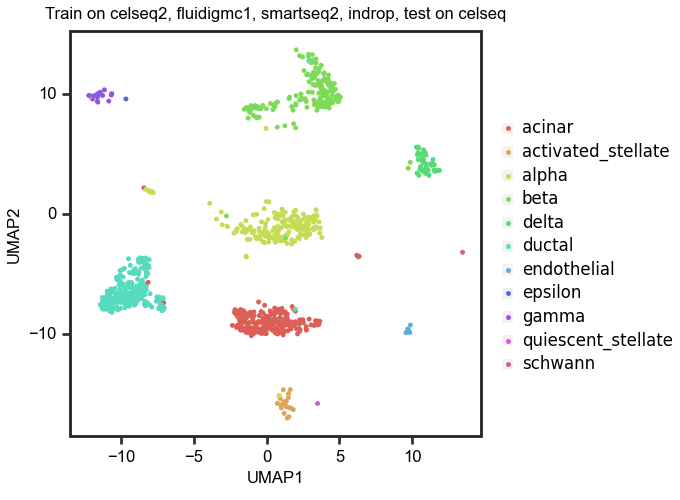

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.4 x 2.5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/panc8_cell_type_cellseq_UMAP.pdf


In [58]:
test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=32, shuffle=False)
result=[]
for i, batch in enumerate(test_loader):
    inputs, labels = batch
            
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
            
    outputs,_,_,_ = model(inputs)
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)
    #print(pred,labels)

#umap of total dataset


result=[label_dict_revese[label] for label in result]

#UMAP pseudotime
from plotnine import *
import pandas as pd


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"



data = pd.read_csv("data/panc8/embedding.csv",index_col=0)
data.columns=["UMAP1","UMAP2"]

meta_data=pd.read_csv("data/panc8/meta_data.csv",index_col=0)


data["Technology"]=meta_data["tech"]
data["Cell type"]=meta_data["celltype"]


#select indrop
data_fluidigmc1=data[data["Technology"] == "celseq"]
meta_data_fluidigmc1=meta_data[data["Technology"] == "celseq"]
data_fluidigmc1["celltype"]=result


p =(ggplot()
    + geom_point(data_fluidigmc1, aes(x='UMAP1', y='UMAP2',color="factor(celltype)"),size=0.001,alpha=1)

    +theme(
        figure_size=[3.4,2.5],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.75,0.9), 
        legend_direction='vertical',
        #legend_position='right',
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("Train on celseq2, fluidigmc1, smartseq2, indrop, test on celseq")
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/panc8_cell_type_celseq_UMAP.pdf')


In [22]:
#test on cellseq2

#GO_Net
import math
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split as ts

data_rm_sparse=data_rm_sparse

#data_rm_sparse.index=meta_data["celltype"].to_list()

###############################################################
gene_to_TF_transform_matrix=pickle.load(open("%s/gene_to_TF_transform_matrix" %base_dir,"rb"))
TF_mask=pickle.load(open("%s/TF_mask" %base_dir,"rb"))
GO_mask=pickle.load(open("%s/GO_mask" %base_dir,"rb"))
GO_TF_mask=pickle.load(open("%s/GO_TF_mask" %base_dir,"rb"))
###############################################################
#data_annotation = pd.read_csv('data/macparland/GSE115469_CellClusterType.txt', sep="\t")
#index_rename_dict = {key: value for key, value in zip(data_annotation['CellName'], data_annotation['CellType'])}
#$data_rm_sparse=data_rm_sparse.rename(index=index_rename_dict)

#normalize by row
#data_rm_sparse = data_rm_sparse.apply(lambda row: row / np.linalg.norm(row), axis=1)

#merge similar cell types
#data_rm_sparse.index = data_rm_sparse.index.str.replace('Hepatocyte_\d+', 'Hepatocyte', regex=True)
#data_rm_sparse.index = data_rm_sparse.index.str.replace('gamma-delta_T_Cells_\d+', 'gamma-delta_T_Cells', regex=True)


#filter low count cells
#data_rm_sparse = data_rm_sparse[data_rm_sparse.index != 'Hepatic_Stellate_Cells']


#novel_cell_type = ['Plasma_Cells']

#data_rm_sparse_novel = data_rm_sparse[data_rm_sparse.index.isin(novel_cell_type)]
#data_rm_sparse_rest = data_rm_sparse[~data_rm_sparse.index.isin(novel_cell_type)]




classes=[]
for celltype in meta_data["celltype"]:
    if celltype not in classes:
        classes.append(celltype)
#print(len(classes),classes)


label_dict_revese={}
label_dict={}
for i,celltype in enumerate(classes):
    label_dict[celltype]=i
    label_dict_revese[i]=celltype
label_dict
################################################################



def gen_mask(row,col,percent=0.5,num_zeros=None):
    if num_zeros is None:
        #Total number being masked is 0.5 by default
        num_zeros=int((row*col)*percent)
    
    mask=np.hstack([np.zeros(num_zeros),np.ones(row*col-num_zeros)])
    np.random.shuffle(mask)
    return mask.reshape(row,col)

class LinearFunction(torch.autograd.Function):
    """
    autograd function which masks it's weights by 'mask'.
    """
    
    #Not that both forward and backword are @staticmethod

    
    #bias, mask is an optional argument
    @staticmethod
    def forward(ctx, input, weight, bias=None, mask=None):
        if mask is not None:
            #change weight to 0 where mask == 0

            weight=weight*mask
 
        output=input.mm(weight.t())

        if bias is not None:
            output+=bias.unsqueeze(0).expand_as(output)
        
        ctx.save_for_backward(input, weight, bias, mask)

        return output
    
    #This function has noly a single output, so it gets only one gradient
    @staticmethod
    def backward(ctx,grad_output):
        input,weight,bias,mask = ctx.saved_tensors
        grad_input=grad_weight=grad_bias=grad_mask=None
        
        #These meeds_input_grad checks are optional and there only to improve efficiency.
        #If you want to make your code simpler, you can skip them. Returning gradients for
        #inputs that don't require it is not an error.
        if ctx.needs_input_grad[0]:
            grad_input=grad_output.mm(weight)
        
        if ctx.needs_input_grad[1]:
            grad_weight=grad_output.t().mm(input)
            
            if mask is not None:
                
                #change grad_weight to 0 where mask == 0
                grad_weight=grad_weight*mask

        
        #if bias is not None and ctx.need_input_grad[2]:
        if ctx.needs_input_grad[2]:
            grad_bias=grad_output.sum(0).squeeze(0)
        
        return grad_input,grad_weight,grad_bias,grad_mask
    

       
class CustomizedLinear(nn.Module):
    def __init__(self,input_features,output_features, bias=None, mask=None):
        """
        Arguments
        mask [numpy array]:
            The shape is (n_input_fearues,n_output_features).
            The elements are 0 or 1 which delcare un-connected or connected.
            
        bias [bool]:
            flg of bias.
        """
        super(CustomizedLinear,self).__init__()
        self.input_features=input_features
        self.out_features=output_features
        
        #nn.Parameter is a spetial kind of Tensor, that will get
        #automatically registered as Module's parameter once it's assigned
        #as an attribute
        self.weight=nn.Parameter(torch.Tensor(self.out_features,self.input_features))
        
        if bias:

            self.bias=nn.Parameter(torch.Tensor(self.out_features))
        else:
            #You should always register all possible parameters, but the
            #optinal ones can be None if you want.
            self.register_parameter("bias",None)
            
        #Initialize the above parameters (weight and bias). Important!
        self.init_params()
        
        #mask should be registered after weight and bias
        if mask is not None:
            mask=torch.tensor(mask,dtype=torch.float).t()
            self.mask=nn.Parameter(mask,requires_grad=False)
        else:
            self.register_parameter("mask",None)

        
    def init_params(self):
        stdv=1./math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv,stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv,stdv)
                
    def forward(self,input):
        #See the autograd section for explanation of what happens here.
        
        output=LinearFunction.apply(input,self.weight,self.bias,self.mask)
        
        return output
        
    def extra_repr(self):
        #(Optional) Set the extra informatioin about this module. You can test
        #it by printing an object of this class.
        return "input_features={}, output_features={}, bias={}, mask={}".format(
            self.input_features, self.out_features,
            self.bias is not None, self.mask is not None)
        
        
class GO_Net(nn.Module):
    def __init__(self,in_size,out_size,ratio=[0.006525,0,0]):
        super(GO_Net,self).__init__()

        self.gene_number=len(gene_expressed_cell_number.index.tolist())    #6033
        self.TF_number=1209
        self.GO_number=len(GO_list)
        self.class_number=3

        self.gene_to_TF_transform_matrix=torch.tensor(gene_to_TF_transform_matrix,dtype=torch.float32)
    
        
        self.bn0=nn.BatchNorm1d(self.gene_number)
        #self.fc1=CustomizedLinear(in_size,2290,mask=gen_mask(3443,2290,ratio[0]))  
        #self.fc1=CustomizedLinear(in_size,1946,mask=gen_mask(2903,1946,ratio[0]))        
        self.fc1=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        self.gene_to_GO_layer=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        #self.fc1=CustomizedLinear(in_size,2290,mask=np.ones((3443,2290)))
    
        self.bn1=nn.BatchNorm1d(self.GO_number)
                
        self.fc2=CustomizedLinear(self.GO_number,out_size,mask=gen_mask(self.GO_number,out_size,ratio[1]))
        self.bn2=nn.BatchNorm1d(out_size)

        self.gene_to_TF_layer=CustomizedLinear(self.gene_number,self.TF_number,mask=TF_mask)
        self.TF_to_GO_layer=CustomizedLinear(self.TF_number,self.GO_number,mask=GO_TF_mask)
        
        self.fc3=CustomizedLinear(100,100,mask=gen_mask(100,100,ratio[1]))

        self.fc4=CustomizedLinear(100,out_size,mask=gen_mask(100,out_size,ratio[1]))
        
        self.relu=nn.ReLU()
        self.leaky_relu=nn.LeakyReLU()
        #self.dropout = nn.Dropout(0.1)
        for module in self.modules():
            if isinstance(module,nn.Linear):
                nn.init.uniform_(module.weight,a=0,b=1)
            elif isinstance(module,(nn.BatchNorm1d,nn.GroupNorm)):
                nn.init.constant_(module.weight,1)
                nn.init.constant_(module.bias,0)

                        
    def forward(self,x):

        #x=self.bn0(x)
        TF_residul=torch.matmul(x,self.gene_to_TF_transform_matrix)

        TF_derived_from_gene=self.gene_to_TF_layer(x)

        TF_sum=TF_residul+TF_derived_from_gene
        #TF_sum=TF_derived_from_gene

        GO_derived_from_TF=self.TF_to_GO_layer(TF_sum)

        GO_derived_from_gene=self.gene_to_GO_layer(x)

        GO_sum=GO_derived_from_TF+GO_derived_from_gene

        #x=self.bn0(x)
        #x=self.fc1(x)
        #x=self.bn1(x)
        #x=self.relu(x)
        #x=self.dropout(x)
        GO_sum=self.leaky_relu(GO_sum)

        #x=torch.tanh(x) 
        #print(161,self.fc1.weight)
        x=self.fc2(GO_sum)
        #x=self.bn2(x)
        #x=self.relu(x)
        #x=self.leaky_relu(x)
        #x=self.fc3(x)
        #x=self.leaky_relu(x)
        #x=self.fc4(x)
 
        return x,GO_sum,TF_derived_from_gene,GO_derived_from_TF

"""
class Reconstraction(nn.Module):
    def __init__(self,in_size,out_size):
        super(Reconstraction,self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(in_size, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 1000),
            nn.LeakyReLU(True),
            nn.Linear(1000, out_size)
        )

    def forward(self, x):
        x = self.decoder(x)
        return x
"""     


 
class MyDataset(Dataset):
    def __init__(self, x,y):
        self.x=x
        self.y=y

    def __getitem__(self, index):
        features = self.x[index]
        label = self.y[index]
        return features, label

    def __len__(self):
        return len(self.x)

def accuracy_score(y_test,y_pred):
    t=0
    f=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            t+=1
        else:
            f+=1
    return(t/(t+f))



from torch.utils.data import WeightedRandomSampler

def make_weights_for_balanced_classes(dataset, nclasses):
    count = [0] * nclasses
    for item in dataset:
        count[item[1]] += 1
    weight_per_class = [0.] * nclasses
    N = float(sum(count))
    for i in range(nclasses):
        weight_per_class[i] = N/float(count[i])
    weight = [0] * len(dataset)
    for idx, val in enumerate(dataset):
        weight[idx] = weight_per_class[val[1]]
    return weight


class CustomWeightedRandomSampler(WeightedRandomSampler):
    """WeightedRandomSampler except allows for more than 2^24 samples to be sampled"""
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __iter__(self):
        rand_tensor = np.random.choice(range(0, len(self.weights)),
                                       size=self.num_samples,
                                       p=self.weights.numpy() / torch.sum(self.weights).numpy(),
                                       replace=self.replacement)
        rand_tensor = torch.from_numpy(rand_tensor)
        return iter(rand_tensor.tolist())





#training
input_size = len(data_rm_sparse.columns)
output_size = len(classes)

learning_rate = 0.1
epochs = 3


#reconstraction_optimizer = optim.Adam(reconstraction_model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
#reconstraction_criterion = nn.MSELoss()



data_train_x=data_rm_sparse
data_train_y=meta_data["celltype"]


#5-fold cross validation
import numpy as np



#define model and optimizer
model = GO_Net(input_size, output_size,ratio=[0,0,0])
optimizer = optim.Adam(model.parameters(), lr=0.001)


"""
celseq = data[meta_data['tech']=='celseq']
celseq2 = data[meta_data['tech']=='celseq2']
fluidigmc1 = data[meta_data['tech']=='fluidigmc1']
smartseq2 = data[meta_data['tech']=='smartseq2']
indrop = data[meta_data['tech']=='indrop']

"""



# Subset data and annotation based on indices
x_train = data_train_x[meta_data['tech'] != 'celseq2'].to_numpy()
y_train = meta_data[meta_data["tech"] != 'celseq2']["celltype"]
    
x_test = data_train_x[meta_data['tech'] == 'celseq2'].to_numpy()
y_test = meta_data[meta_data["tech"] == 'celseq2']["celltype"]

# Continue with your operations on data_train, anno_train, data_test, and anno_test




#x_train,x_test,y_train,y_test = ts(data_train_x.to_numpy(),data_train_y.to_numpy(),test_size=0.2,random_state=1, shuffle=True)

#x_train=x_train[0:400]
#y_train=y_train[0:400]

#label_dict={25:0,26:1,27:2,33:3,34:4}
y_train_relabeled=[label_dict[label] for label in y_train]
y_test_relabeled=[label_dict[label] for label in y_test]


#train_size=20000

#x_train=x_train[0:train_size]
#y_train_relabeled=y_train_relabeled[0:train_size]

train_data=MyDataset(x_train,y_train_relabeled)



#for unbalanced data
"""
weights=make_weights_for_balanced_classes(train_data,len(classes))
weights = torch.DoubleTensor(weights)
sampler = CustomWeightedRandomSampler(weights, len(weights))        #sampler for imbalanced classes
"""

#train_loader=DataLoader(train_data, batch_size=60, sampler=sampler)
train_loader=DataLoader(train_data, batch_size=60, shuffle=True)

num_epochs=15
# 训练模型
for epoch in range(num_epochs):
    running_loss = 0.0
    reconstraction_running_loss = 0.0

    for i, batch in enumerate(train_loader, 0):
        inputs, labels = batch
        #print(labels)
        inputs=Variable(inputs).to(torch.float32)
        labels=Variable(labels).to(torch.long)
        # 将梯度缓存清零
        optimizer.zero_grad()

        # 前向传播、计算损失和反向传播
        outputs,_,_,_ = model(inputs)

        loss = criterion(outputs, labels)

        #reconstraction_input=reconstraction_model(outputs)
        #reconstraction_loss = reconstraction_criterion(reconstraction_input, inputs)

        #reconstraction_optimizer.zero_grad()

        #combined_loss=loss+reconstraction_loss
        #combined_loss.backward()
        loss.backward()
        
        optimizer.step()
        #reconstraction_optimizer.step()


        #reconstraction_running_loss += reconstraction_loss.item()
        running_loss += loss.item()

        if i % 40 == 0:
            pass
            #print(i)
            #print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            
        if i>400:
            break

    test_data=MyDataset(x_test,y_test_relabeled)
    test_loader=DataLoader(test_data, batch_size=32, shuffle=False)
    result=[]
    for i, batch in enumerate(test_loader):
        inputs, labels = batch
            
        inputs=Variable(inputs).to(torch.float32)

        labels=Variable(labels).to(torch.long)
            
        outputs,_,_,_ = model(inputs)
        pred = list(torch.max(outputs, 1)[1].numpy())
        result.extend(pred)
        #print(pred,labels)
        if i>100:
            break
    accuracy = accuracy_score(y_test_relabeled[0:len(result)],result)
    #f1_score = calculate_multiclass_f1_score(y_test_relabeled[0:len(result)],result)
                #########
    print("epoch %s" %(epoch),"\taccuracy:\t",accuracy,"\tloss:\t",running_loss / len(train_loader) )
        
    #save model
    #pickle.dump(model,open("model/GO_heart.model","wb"))
        
        


epoch 0 	accuracy:	 0.75054704595186 	loss:	 2.555582595168132
epoch 1 	accuracy:	 0.8840262582056893 	loss:	 0.8356977863616853
epoch 2 	accuracy:	 0.9400437636761488 	loss:	 0.6844431170708195
epoch 3 	accuracy:	 0.899343544857768 	loss:	 0.6653264759089665
epoch 4 	accuracy:	 0.9597374179431072 	loss:	 1.0702732003942768
epoch 5 	accuracy:	 0.9614879649890591 	loss:	 0.9252858703174757
epoch 6 	accuracy:	 0.8901531728665207 	loss:	 0.6491872358678783


KeyboardInterrupt: 

In [61]:
#test on smartseq2

#GO_Net
import math
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split as ts

data_rm_sparse=data_rm_sparse

#data_rm_sparse.index=meta_data["celltype"].to_list()

###############################################################
gene_to_TF_transform_matrix=pickle.load(open("%s/gene_to_TF_transform_matrix" %base_dir,"rb"))
TF_mask=pickle.load(open("%s/TF_mask" %base_dir,"rb"))
GO_mask=pickle.load(open("%s/GO_mask" %base_dir,"rb"))
GO_TF_mask=pickle.load(open("%s/GO_TF_mask" %base_dir,"rb"))
###############################################################
#data_annotation = pd.read_csv('data/macparland/GSE115469_CellClusterType.txt', sep="\t")
#index_rename_dict = {key: value for key, value in zip(data_annotation['CellName'], data_annotation['CellType'])}
#$data_rm_sparse=data_rm_sparse.rename(index=index_rename_dict)

#normalize by row
#data_rm_sparse = data_rm_sparse.apply(lambda row: row / np.linalg.norm(row), axis=1)

#merge similar cell types
#data_rm_sparse.index = data_rm_sparse.index.str.replace('Hepatocyte_\d+', 'Hepatocyte', regex=True)
#data_rm_sparse.index = data_rm_sparse.index.str.replace('gamma-delta_T_Cells_\d+', 'gamma-delta_T_Cells', regex=True)


#filter low count cells
#data_rm_sparse = data_rm_sparse[data_rm_sparse.index != 'Hepatic_Stellate_Cells']


#novel_cell_type = ['Plasma_Cells']

#data_rm_sparse_novel = data_rm_sparse[data_rm_sparse.index.isin(novel_cell_type)]
#data_rm_sparse_rest = data_rm_sparse[~data_rm_sparse.index.isin(novel_cell_type)]




classes=[]
for celltype in meta_data["celltype"]:
    if celltype not in classes:
        classes.append(celltype)
#print(len(classes),classes)


label_dict_revese={}
label_dict={}
for i,celltype in enumerate(classes):
    label_dict[celltype]=i
    label_dict_revese[i]=celltype
label_dict
################################################################



def gen_mask(row,col,percent=0.5,num_zeros=None):
    if num_zeros is None:
        #Total number being masked is 0.5 by default
        num_zeros=int((row*col)*percent)
    
    mask=np.hstack([np.zeros(num_zeros),np.ones(row*col-num_zeros)])
    np.random.shuffle(mask)
    return mask.reshape(row,col)

class LinearFunction(torch.autograd.Function):
    """
    autograd function which masks it's weights by 'mask'.
    """
    
    #Not that both forward and backword are @staticmethod

    
    #bias, mask is an optional argument
    @staticmethod
    def forward(ctx, input, weight, bias=None, mask=None):
        if mask is not None:
            #change weight to 0 where mask == 0

            weight=weight*mask
 
        output=input.mm(weight.t())

        if bias is not None:
            output+=bias.unsqueeze(0).expand_as(output)
        
        ctx.save_for_backward(input, weight, bias, mask)

        return output
    
    #This function has noly a single output, so it gets only one gradient
    @staticmethod
    def backward(ctx,grad_output):
        input,weight,bias,mask = ctx.saved_tensors
        grad_input=grad_weight=grad_bias=grad_mask=None
        
        #These meeds_input_grad checks are optional and there only to improve efficiency.
        #If you want to make your code simpler, you can skip them. Returning gradients for
        #inputs that don't require it is not an error.
        if ctx.needs_input_grad[0]:
            grad_input=grad_output.mm(weight)
        
        if ctx.needs_input_grad[1]:
            grad_weight=grad_output.t().mm(input)
            
            if mask is not None:
                
                #change grad_weight to 0 where mask == 0
                grad_weight=grad_weight*mask

        
        #if bias is not None and ctx.need_input_grad[2]:
        if ctx.needs_input_grad[2]:
            grad_bias=grad_output.sum(0).squeeze(0)
        
        return grad_input,grad_weight,grad_bias,grad_mask
    

       
class CustomizedLinear(nn.Module):
    def __init__(self,input_features,output_features, bias=None, mask=None):
        """
        Arguments
        mask [numpy array]:
            The shape is (n_input_fearues,n_output_features).
            The elements are 0 or 1 which delcare un-connected or connected.
            
        bias [bool]:
            flg of bias.
        """
        super(CustomizedLinear,self).__init__()
        self.input_features=input_features
        self.out_features=output_features
        
        #nn.Parameter is a spetial kind of Tensor, that will get
        #automatically registered as Module's parameter once it's assigned
        #as an attribute
        self.weight=nn.Parameter(torch.Tensor(self.out_features,self.input_features))
        
        if bias:

            self.bias=nn.Parameter(torch.Tensor(self.out_features))
        else:
            #You should always register all possible parameters, but the
            #optinal ones can be None if you want.
            self.register_parameter("bias",None)
            
        #Initialize the above parameters (weight and bias). Important!
        self.init_params()
        
        #mask should be registered after weight and bias
        if mask is not None:
            mask=torch.tensor(mask,dtype=torch.float).t()
            self.mask=nn.Parameter(mask,requires_grad=False)
        else:
            self.register_parameter("mask",None)

        
    def init_params(self):
        stdv=1./math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv,stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv,stdv)
                
    def forward(self,input):
        #See the autograd section for explanation of what happens here.
        
        output=LinearFunction.apply(input,self.weight,self.bias,self.mask)
        
        return output
        
    def extra_repr(self):
        #(Optional) Set the extra informatioin about this module. You can test
        #it by printing an object of this class.
        return "input_features={}, output_features={}, bias={}, mask={}".format(
            self.input_features, self.out_features,
            self.bias is not None, self.mask is not None)
        
        
class GO_Net(nn.Module):
    def __init__(self,in_size,out_size,ratio=[0.006525,0,0]):
        super(GO_Net,self).__init__()

        self.gene_number=len(gene_expressed_cell_number.index.tolist())    #6033
        self.TF_number=1209
        self.GO_number=len(GO_list)
        self.class_number=3

        self.gene_to_TF_transform_matrix=torch.tensor(gene_to_TF_transform_matrix,dtype=torch.float32)
    
        
        self.bn0=nn.BatchNorm1d(self.gene_number)
        #self.fc1=CustomizedLinear(in_size,2290,mask=gen_mask(3443,2290,ratio[0]))  
        #self.fc1=CustomizedLinear(in_size,1946,mask=gen_mask(2903,1946,ratio[0]))        
        self.fc1=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        self.gene_to_GO_layer=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        #self.fc1=CustomizedLinear(in_size,2290,mask=np.ones((3443,2290)))
    
        self.bn1=nn.BatchNorm1d(self.GO_number)
                
        self.fc2=CustomizedLinear(self.GO_number,out_size,mask=gen_mask(self.GO_number,out_size,ratio[1]))
        self.bn2=nn.BatchNorm1d(out_size)

        self.gene_to_TF_layer=CustomizedLinear(self.gene_number,self.TF_number,mask=TF_mask)
        self.TF_to_GO_layer=CustomizedLinear(self.TF_number,self.GO_number,mask=GO_TF_mask)
        
        self.fc3=CustomizedLinear(100,100,mask=gen_mask(100,100,ratio[1]))

        self.fc4=CustomizedLinear(100,out_size,mask=gen_mask(100,out_size,ratio[1]))
        
        self.relu=nn.ReLU()
        self.leaky_relu=nn.LeakyReLU()
        #self.dropout = nn.Dropout(0.1)
        for module in self.modules():
            if isinstance(module,nn.Linear):
                nn.init.uniform_(module.weight,a=0,b=1)
            elif isinstance(module,(nn.BatchNorm1d,nn.GroupNorm)):
                nn.init.constant_(module.weight,1)
                nn.init.constant_(module.bias,0)

                        
    def forward(self,x):

        #x=self.bn0(x)
        TF_residul=torch.matmul(x,self.gene_to_TF_transform_matrix)

        TF_derived_from_gene=self.gene_to_TF_layer(x)

        TF_sum=TF_residul+TF_derived_from_gene
        #TF_sum=TF_derived_from_gene

        GO_derived_from_TF=self.TF_to_GO_layer(TF_sum)

        GO_derived_from_gene=self.gene_to_GO_layer(x)

        GO_sum=GO_derived_from_TF+GO_derived_from_gene

        #x=self.bn0(x)
        #x=self.fc1(x)
        #x=self.bn1(x)
        #x=self.relu(x)
        #x=self.dropout(x)
        GO_sum=self.leaky_relu(GO_sum)

        #x=torch.tanh(x) 
        #print(161,self.fc1.weight)
        x=self.fc2(GO_sum)
        #x=self.bn2(x)
        #x=self.relu(x)
        #x=self.leaky_relu(x)
        #x=self.fc3(x)
        #x=self.leaky_relu(x)
        #x=self.fc4(x)
 
        return x,GO_sum,TF_derived_from_gene,GO_derived_from_TF

"""
class Reconstraction(nn.Module):
    def __init__(self,in_size,out_size):
        super(Reconstraction,self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(in_size, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 1000),
            nn.LeakyReLU(True),
            nn.Linear(1000, out_size)
        )

    def forward(self, x):
        x = self.decoder(x)
        return x
"""     


 
class MyDataset(Dataset):
    def __init__(self, x,y):
        self.x=x
        self.y=y

    def __getitem__(self, index):
        features = self.x[index]
        label = self.y[index]
        return features, label

    def __len__(self):
        return len(self.x)

def accuracy_score(y_test,y_pred):
    t=0
    f=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            t+=1
        else:
            f+=1
    return(t/(t+f))



from torch.utils.data import WeightedRandomSampler

def make_weights_for_balanced_classes(dataset, nclasses):
    count = [0] * nclasses
    for item in dataset:
        count[item[1]] += 1
    weight_per_class = [0.] * nclasses
    N = float(sum(count))
    for i in range(nclasses):
        weight_per_class[i] = N/float(count[i])
    weight = [0] * len(dataset)
    for idx, val in enumerate(dataset):
        weight[idx] = weight_per_class[val[1]]
    return weight


class CustomWeightedRandomSampler(WeightedRandomSampler):
    """WeightedRandomSampler except allows for more than 2^24 samples to be sampled"""
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __iter__(self):
        rand_tensor = np.random.choice(range(0, len(self.weights)),
                                       size=self.num_samples,
                                       p=self.weights.numpy() / torch.sum(self.weights).numpy(),
                                       replace=self.replacement)
        rand_tensor = torch.from_numpy(rand_tensor)
        return iter(rand_tensor.tolist())





#training
input_size = len(data_rm_sparse.columns)
output_size = len(classes)

learning_rate = 0.1
epochs = 3


#reconstraction_optimizer = optim.Adam(reconstraction_model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
#reconstraction_criterion = nn.MSELoss()



data_train_x=data_rm_sparse
data_train_y=meta_data["celltype"]


#5-fold cross validation
import numpy as np



#define model and optimizer
model = GO_Net(input_size, output_size,ratio=[0,0,0])
optimizer = optim.Adam(model.parameters(), lr=0.001)


"""
celseq = data[meta_data['tech']=='celseq']
celseq2 = data[meta_data['tech']=='celseq2']
fluidigmc1 = data[meta_data['tech']=='fluidigmc1']
smartseq2 = data[meta_data['tech']=='smartseq2']
indrop = data[meta_data['tech']=='indrop']

"""



# Subset data and annotation based on indices
x_train = data_train_x[meta_data['tech'] != 'smartseq2'].to_numpy()
y_train = meta_data[meta_data["tech"] != 'smartseq2']["celltype"]
    
x_test = data_train_x[meta_data['tech'] == 'smartseq2'].to_numpy()
y_test = meta_data[meta_data["tech"] == 'smartseq2']["celltype"]

# Continue with your operations on data_train, anno_train, data_test, and anno_test




#x_train,x_test,y_train,y_test = ts(data_train_x.to_numpy(),data_train_y.to_numpy(),test_size=0.2,random_state=1, shuffle=True)

#x_train=x_train[0:400]
#y_train=y_train[0:400]

#label_dict={25:0,26:1,27:2,33:3,34:4}
y_train_relabeled=[label_dict[label] for label in y_train]
y_test_relabeled=[label_dict[label] for label in y_test]


#train_size=20000

#x_train=x_train[0:train_size]
#y_train_relabeled=y_train_relabeled[0:train_size]

train_data=MyDataset(x_train,y_train_relabeled)



#for unbalanced data
"""
weights=make_weights_for_balanced_classes(train_data,len(classes))
weights = torch.DoubleTensor(weights)
sampler = CustomWeightedRandomSampler(weights, len(weights))        #sampler for imbalanced classes
"""

#train_loader=DataLoader(train_data, batch_size=60, sampler=sampler)
train_loader=DataLoader(train_data, batch_size=60, shuffle=True)

num_epochs=15
# 训练模型
for epoch in range(num_epochs):
    running_loss = 0.0
    reconstraction_running_loss = 0.0

    for i, batch in enumerate(train_loader, 0):
        inputs, labels = batch
        #print(labels)
        inputs=Variable(inputs).to(torch.float32)
        labels=Variable(labels).to(torch.long)
        # 将梯度缓存清零
        optimizer.zero_grad()

        # 前向传播、计算损失和反向传播
        outputs,_,_,_ = model(inputs)

        loss = criterion(outputs, labels)

        #reconstraction_input=reconstraction_model(outputs)
        #reconstraction_loss = reconstraction_criterion(reconstraction_input, inputs)

        #reconstraction_optimizer.zero_grad()

        #combined_loss=loss+reconstraction_loss
        #combined_loss.backward()
        loss.backward()
        
        optimizer.step()
        #reconstraction_optimizer.step()


        #reconstraction_running_loss += reconstraction_loss.item()
        running_loss += loss.item()

        if i % 40 == 0:
            pass
            #print(i)
            #print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            
        if i>400:
            break

    test_data=MyDataset(x_test,y_test_relabeled)
    test_loader=DataLoader(test_data, batch_size=32, shuffle=False)
    result=[]
    for i, batch in enumerate(test_loader):
        inputs, labels = batch
            
        inputs=Variable(inputs).to(torch.float32)

        labels=Variable(labels).to(torch.long)
            
        outputs,_,_,_ = model(inputs)
        pred = list(torch.max(outputs, 1)[1].numpy())
        result.extend(pred)
        #print(pred,labels)
        if i>100:
            break
    accuracy = accuracy_score(y_test_relabeled[0:len(result)],result)
    #f1_score = calculate_multiclass_f1_score(y_test_relabeled[0:len(result)],result)
                #########
    print("epoch %s" %(epoch),"\taccuracy:\t",accuracy,"\tloss:\t",running_loss / len(train_loader) )
        
    #save model
    #pickle.dump(model,open("model/GO_heart.model","wb"))
        
        


epoch 0 	accuracy:	 0.9523809523809523 	loss:	 2.1262045734022794
epoch 1 	accuracy:	 0.9598997493734336 	loss:	 1.3683569232385124
epoch 2 	accuracy:	 0.9678362573099415 	loss:	 1.0861079886234832
epoch 3 	accuracy:	 0.9699248120300752 	loss:	 0.3474153325153274
epoch 4 	accuracy:	 0.9690893901420217 	loss:	 0.30268718488068813
epoch 5 	accuracy:	 0.9653299916457811 	loss:	 0.2019723515364934
epoch 6 	accuracy:	 0.9603174603174603 	loss:	 0.46318601425870826


KeyboardInterrupt: 

/tmp/ipykernel_55243/1691008825.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


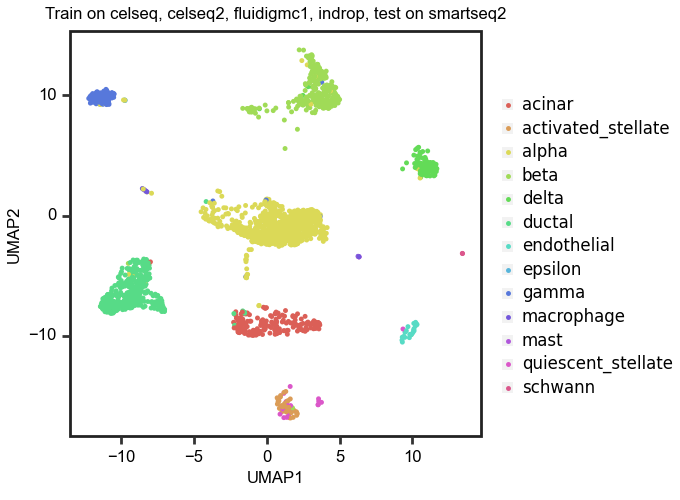

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.4 x 2.5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/panc8_cell_type_smartseq2_UMAP.pdf


In [62]:
test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=32, shuffle=False)
result=[]
for i, batch in enumerate(test_loader):
    inputs, labels = batch
            
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
            
    outputs,_,_,_ = model(inputs)
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)
    #print(pred,labels)

#umap of total dataset


result=[label_dict_revese[label] for label in result]

#UMAP pseudotime
from plotnine import *
import pandas as pd


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"



data = pd.read_csv("data/panc8/embedding.csv",index_col=0)
data.columns=["UMAP1","UMAP2"]

meta_data=pd.read_csv("data/panc8/meta_data.csv",index_col=0)


data["Technology"]=meta_data["tech"]
data["Cell type"]=meta_data["celltype"]


#select indrop
data_fluidigmc1=data[data["Technology"] == "smartseq2"]
meta_data_fluidigmc1=meta_data[data["Technology"] == "smartseq2"]
data_fluidigmc1["celltype"]=result


p =(ggplot()
    + geom_point(data_fluidigmc1, aes(x='UMAP1', y='UMAP2',color="factor(celltype)"),size=0.001,alpha=1)

    +theme(
        figure_size=[3.4,2.5],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.75,0.9), 
        legend_direction='vertical',
        #legend_position='right',
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("Train on celseq, celseq2, fluidigmc1, indrop, test on smartseq2")
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/panc8_cell_type_smartseq2_UMAP.pdf')


In [63]:
#test on indrop

#GO_Net
import math
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split as ts

data_rm_sparse=data_rm_sparse

#data_rm_sparse.index=meta_data["celltype"].to_list()

###############################################################
gene_to_TF_transform_matrix=pickle.load(open("%s/gene_to_TF_transform_matrix" %base_dir,"rb"))
TF_mask=pickle.load(open("%s/TF_mask" %base_dir,"rb"))
GO_mask=pickle.load(open("%s/GO_mask" %base_dir,"rb"))
GO_TF_mask=pickle.load(open("%s/GO_TF_mask" %base_dir,"rb"))
###############################################################
#data_annotation = pd.read_csv('data/macparland/GSE115469_CellClusterType.txt', sep="\t")
#index_rename_dict = {key: value for key, value in zip(data_annotation['CellName'], data_annotation['CellType'])}
#$data_rm_sparse=data_rm_sparse.rename(index=index_rename_dict)

#normalize by row
#data_rm_sparse = data_rm_sparse.apply(lambda row: row / np.linalg.norm(row), axis=1)

#merge similar cell types
#data_rm_sparse.index = data_rm_sparse.index.str.replace('Hepatocyte_\d+', 'Hepatocyte', regex=True)
#data_rm_sparse.index = data_rm_sparse.index.str.replace('gamma-delta_T_Cells_\d+', 'gamma-delta_T_Cells', regex=True)


#filter low count cells
#data_rm_sparse = data_rm_sparse[data_rm_sparse.index != 'Hepatic_Stellate_Cells']


#novel_cell_type = ['Plasma_Cells']

#data_rm_sparse_novel = data_rm_sparse[data_rm_sparse.index.isin(novel_cell_type)]
#data_rm_sparse_rest = data_rm_sparse[~data_rm_sparse.index.isin(novel_cell_type)]




classes=[]
for celltype in meta_data["celltype"]:
    if celltype not in classes:
        classes.append(celltype)
#print(len(classes),classes)


label_dict_revese={}
label_dict={}
for i,celltype in enumerate(classes):
    label_dict[celltype]=i
    label_dict_revese[i]=celltype
label_dict
################################################################



def gen_mask(row,col,percent=0.5,num_zeros=None):
    if num_zeros is None:
        #Total number being masked is 0.5 by default
        num_zeros=int((row*col)*percent)
    
    mask=np.hstack([np.zeros(num_zeros),np.ones(row*col-num_zeros)])
    np.random.shuffle(mask)
    return mask.reshape(row,col)

class LinearFunction(torch.autograd.Function):
    """
    autograd function which masks it's weights by 'mask'.
    """
    
    #Not that both forward and backword are @staticmethod

    
    #bias, mask is an optional argument
    @staticmethod
    def forward(ctx, input, weight, bias=None, mask=None):
        if mask is not None:
            #change weight to 0 where mask == 0

            weight=weight*mask
 
        output=input.mm(weight.t())

        if bias is not None:
            output+=bias.unsqueeze(0).expand_as(output)
        
        ctx.save_for_backward(input, weight, bias, mask)

        return output
    
    #This function has noly a single output, so it gets only one gradient
    @staticmethod
    def backward(ctx,grad_output):
        input,weight,bias,mask = ctx.saved_tensors
        grad_input=grad_weight=grad_bias=grad_mask=None
        
        #These meeds_input_grad checks are optional and there only to improve efficiency.
        #If you want to make your code simpler, you can skip them. Returning gradients for
        #inputs that don't require it is not an error.
        if ctx.needs_input_grad[0]:
            grad_input=grad_output.mm(weight)
        
        if ctx.needs_input_grad[1]:
            grad_weight=grad_output.t().mm(input)
            
            if mask is not None:
                
                #change grad_weight to 0 where mask == 0
                grad_weight=grad_weight*mask

        
        #if bias is not None and ctx.need_input_grad[2]:
        if ctx.needs_input_grad[2]:
            grad_bias=grad_output.sum(0).squeeze(0)
        
        return grad_input,grad_weight,grad_bias,grad_mask
    

       
class CustomizedLinear(nn.Module):
    def __init__(self,input_features,output_features, bias=None, mask=None):
        """
        Arguments
        mask [numpy array]:
            The shape is (n_input_fearues,n_output_features).
            The elements are 0 or 1 which delcare un-connected or connected.
            
        bias [bool]:
            flg of bias.
        """
        super(CustomizedLinear,self).__init__()
        self.input_features=input_features
        self.out_features=output_features
        
        #nn.Parameter is a spetial kind of Tensor, that will get
        #automatically registered as Module's parameter once it's assigned
        #as an attribute
        self.weight=nn.Parameter(torch.Tensor(self.out_features,self.input_features))
        
        if bias:

            self.bias=nn.Parameter(torch.Tensor(self.out_features))
        else:
            #You should always register all possible parameters, but the
            #optinal ones can be None if you want.
            self.register_parameter("bias",None)
            
        #Initialize the above parameters (weight and bias). Important!
        self.init_params()
        
        #mask should be registered after weight and bias
        if mask is not None:
            mask=torch.tensor(mask,dtype=torch.float).t()
            self.mask=nn.Parameter(mask,requires_grad=False)
        else:
            self.register_parameter("mask",None)

        
    def init_params(self):
        stdv=1./math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv,stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv,stdv)
                
    def forward(self,input):
        #See the autograd section for explanation of what happens here.
        
        output=LinearFunction.apply(input,self.weight,self.bias,self.mask)
        
        return output
        
    def extra_repr(self):
        #(Optional) Set the extra informatioin about this module. You can test
        #it by printing an object of this class.
        return "input_features={}, output_features={}, bias={}, mask={}".format(
            self.input_features, self.out_features,
            self.bias is not None, self.mask is not None)
        
        
class GO_Net(nn.Module):
    def __init__(self,in_size,out_size,ratio=[0.006525,0,0]):
        super(GO_Net,self).__init__()

        self.gene_number=len(gene_expressed_cell_number.index.tolist())    #6033
        self.TF_number=1209
        self.GO_number=len(GO_list)
        self.class_number=3

        self.gene_to_TF_transform_matrix=torch.tensor(gene_to_TF_transform_matrix,dtype=torch.float32)
    
        
        self.bn0=nn.BatchNorm1d(self.gene_number)
        #self.fc1=CustomizedLinear(in_size,2290,mask=gen_mask(3443,2290,ratio[0]))  
        #self.fc1=CustomizedLinear(in_size,1946,mask=gen_mask(2903,1946,ratio[0]))        
        self.fc1=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        self.gene_to_GO_layer=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        #self.fc1=CustomizedLinear(in_size,2290,mask=np.ones((3443,2290)))
    
        self.bn1=nn.BatchNorm1d(self.GO_number)
                
        self.fc2=CustomizedLinear(self.GO_number,out_size,mask=gen_mask(self.GO_number,out_size,ratio[1]))
        self.bn2=nn.BatchNorm1d(out_size)

        self.gene_to_TF_layer=CustomizedLinear(self.gene_number,self.TF_number,mask=TF_mask)
        self.TF_to_GO_layer=CustomizedLinear(self.TF_number,self.GO_number,mask=GO_TF_mask)
        
        self.fc3=CustomizedLinear(100,100,mask=gen_mask(100,100,ratio[1]))

        self.fc4=CustomizedLinear(100,out_size,mask=gen_mask(100,out_size,ratio[1]))
        
        self.relu=nn.ReLU()
        self.leaky_relu=nn.LeakyReLU()
        #self.dropout = nn.Dropout(0.1)
        for module in self.modules():
            if isinstance(module,nn.Linear):
                nn.init.uniform_(module.weight,a=0,b=1)
            elif isinstance(module,(nn.BatchNorm1d,nn.GroupNorm)):
                nn.init.constant_(module.weight,1)
                nn.init.constant_(module.bias,0)

                        
    def forward(self,x):

        #x=self.bn0(x)
        TF_residul=torch.matmul(x,self.gene_to_TF_transform_matrix)

        TF_derived_from_gene=self.gene_to_TF_layer(x)

        TF_sum=TF_residul+TF_derived_from_gene
        #TF_sum=TF_derived_from_gene

        GO_derived_from_TF=self.TF_to_GO_layer(TF_sum)

        GO_derived_from_gene=self.gene_to_GO_layer(x)

        GO_sum=GO_derived_from_TF+GO_derived_from_gene

        #x=self.bn0(x)
        #x=self.fc1(x)
        #x=self.bn1(x)
        #x=self.relu(x)
        #x=self.dropout(x)
        GO_sum=self.leaky_relu(GO_sum)

        #x=torch.tanh(x) 
        #print(161,self.fc1.weight)
        x=self.fc2(GO_sum)
        #x=self.bn2(x)
        #x=self.relu(x)
        #x=self.leaky_relu(x)
        #x=self.fc3(x)
        #x=self.leaky_relu(x)
        #x=self.fc4(x)
 
        return x,GO_sum,TF_derived_from_gene,GO_derived_from_TF

"""
class Reconstraction(nn.Module):
    def __init__(self,in_size,out_size):
        super(Reconstraction,self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(in_size, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 1000),
            nn.LeakyReLU(True),
            nn.Linear(1000, out_size)
        )

    def forward(self, x):
        x = self.decoder(x)
        return x
"""     


 
class MyDataset(Dataset):
    def __init__(self, x,y):
        self.x=x
        self.y=y

    def __getitem__(self, index):
        features = self.x[index]
        label = self.y[index]
        return features, label

    def __len__(self):
        return len(self.x)

def accuracy_score(y_test,y_pred):
    t=0
    f=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            t+=1
        else:
            f+=1
    return(t/(t+f))



from torch.utils.data import WeightedRandomSampler

def make_weights_for_balanced_classes(dataset, nclasses):
    count = [0] * nclasses
    for item in dataset:
        count[item[1]] += 1
    weight_per_class = [0.] * nclasses
    N = float(sum(count))
    for i in range(nclasses):
        weight_per_class[i] = N/float(count[i])
    weight = [0] * len(dataset)
    for idx, val in enumerate(dataset):
        weight[idx] = weight_per_class[val[1]]
    return weight


class CustomWeightedRandomSampler(WeightedRandomSampler):
    """WeightedRandomSampler except allows for more than 2^24 samples to be sampled"""
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __iter__(self):
        rand_tensor = np.random.choice(range(0, len(self.weights)),
                                       size=self.num_samples,
                                       p=self.weights.numpy() / torch.sum(self.weights).numpy(),
                                       replace=self.replacement)
        rand_tensor = torch.from_numpy(rand_tensor)
        return iter(rand_tensor.tolist())





#training
input_size = len(data_rm_sparse.columns)
output_size = len(classes)

learning_rate = 0.1
epochs = 3


#reconstraction_optimizer = optim.Adam(reconstraction_model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
#reconstraction_criterion = nn.MSELoss()



data_train_x=data_rm_sparse
data_train_y=meta_data["celltype"]


#5-fold cross validation
import numpy as np



#define model and optimizer
model = GO_Net(input_size, output_size,ratio=[0,0,0])
optimizer = optim.Adam(model.parameters(), lr=0.001)


"""
celseq = data[meta_data['tech']=='celseq']
celseq2 = data[meta_data['tech']=='celseq2']
fluidigmc1 = data[meta_data['tech']=='fluidigmc1']
smartseq2 = data[meta_data['tech']=='smartseq2']
indrop = data[meta_data['tech']=='indrop']

"""



# Subset data and annotation based on indices
x_train = data_train_x[meta_data['tech'] != 'indrop'].to_numpy()
y_train = meta_data[meta_data["tech"] != 'indrop']["celltype"]
    
x_test = data_train_x[meta_data['tech'] == 'indrop'].to_numpy()
y_test = meta_data[meta_data["tech"] == 'indrop']["celltype"]

# Continue with your operations on data_train, anno_train, data_test, and anno_test




#x_train,x_test,y_train,y_test = ts(data_train_x.to_numpy(),data_train_y.to_numpy(),test_size=0.2,random_state=1, shuffle=True)

#x_train=x_train[0:400]
#y_train=y_train[0:400]

#label_dict={25:0,26:1,27:2,33:3,34:4}
y_train_relabeled=[label_dict[label] for label in y_train]
y_test_relabeled=[label_dict[label] for label in y_test]


#train_size=20000

#x_train=x_train[0:train_size]
#y_train_relabeled=y_train_relabeled[0:train_size]

train_data=MyDataset(x_train,y_train_relabeled)



#for unbalanced data
"""
weights=make_weights_for_balanced_classes(train_data,len(classes))
weights = torch.DoubleTensor(weights)
sampler = CustomWeightedRandomSampler(weights, len(weights))        #sampler for imbalanced classes
"""

#train_loader=DataLoader(train_data, batch_size=60, sampler=sampler)
train_loader=DataLoader(train_data, batch_size=60, shuffle=True)

num_epochs=15
# 训练模型
for epoch in range(num_epochs):
    running_loss = 0.0
    reconstraction_running_loss = 0.0

    for i, batch in enumerate(train_loader, 0):
        inputs, labels = batch
        #print(labels)
        inputs=Variable(inputs).to(torch.float32)
        labels=Variable(labels).to(torch.long)
        # 将梯度缓存清零
        optimizer.zero_grad()

        # 前向传播、计算损失和反向传播
        outputs,_,_,_ = model(inputs)

        loss = criterion(outputs, labels)

        #reconstraction_input=reconstraction_model(outputs)
        #reconstraction_loss = reconstraction_criterion(reconstraction_input, inputs)

        #reconstraction_optimizer.zero_grad()

        #combined_loss=loss+reconstraction_loss
        #combined_loss.backward()
        loss.backward()
        
        optimizer.step()
        #reconstraction_optimizer.step()


        #reconstraction_running_loss += reconstraction_loss.item()
        running_loss += loss.item()

        if i % 40 == 0:
            pass
            #print(i)
            #print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            
        if i>400:
            break

    test_data=MyDataset(x_test,y_test_relabeled)
    test_loader=DataLoader(test_data, batch_size=32, shuffle=False)
    result=[]
    for i, batch in enumerate(test_loader):
        inputs, labels = batch
            
        inputs=Variable(inputs).to(torch.float32)

        labels=Variable(labels).to(torch.long)
            
        outputs,_,_,_ = model(inputs)
        pred = list(torch.max(outputs, 1)[1].numpy())
        result.extend(pred)
        #print(pred,labels)
        if i>100:
            break
    accuracy = accuracy_score(y_test_relabeled[0:len(result)],result)
    #f1_score = calculate_multiclass_f1_score(y_test_relabeled[0:len(result)],result)
                #########
    print("epoch %s" %(epoch),"\taccuracy:\t",accuracy,"\tloss:\t",running_loss / len(train_loader) )
        
    #save model
    #pickle.dump(model,open("model/GO_heart.model","wb"))
        
        


epoch 0 	accuracy:	 0.9031862745098039 	loss:	 2.6230402650698177
epoch 1 	accuracy:	 0.8777573529411765 	loss:	 0.8065015277210271
epoch 2 	accuracy:	 0.8930759803921569 	loss:	 0.6115025553922608
epoch 3 	accuracy:	 0.9362745098039216 	loss:	 0.7523025186416114
epoch 4 	accuracy:	 0.9090073529411765 	loss:	 0.8022120680115273
epoch 5 	accuracy:	 0.9417892156862745 	loss:	 0.7136866915619599
epoch 6 	accuracy:	 0.9224877450980392 	loss:	 0.5082881993412057


KeyboardInterrupt: 

/tmp/ipykernel_55243/905394938.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


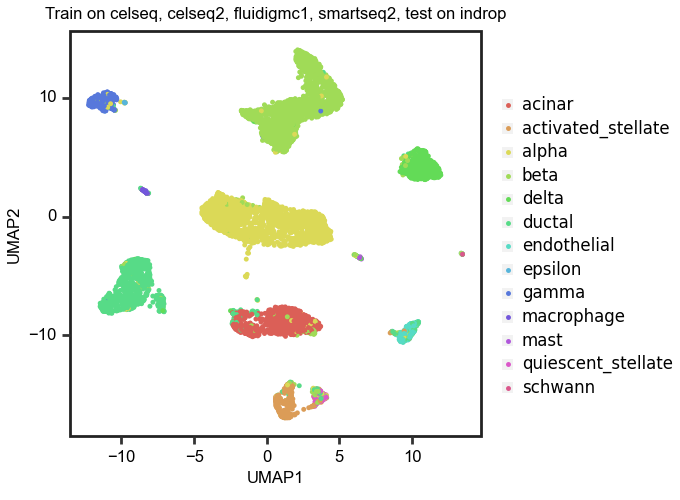

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.4 x 2.5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/panc8_cell_type_indrop_UMAP.pdf


In [64]:
test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=32, shuffle=False)
result=[]
for i, batch in enumerate(test_loader):
    inputs, labels = batch
            
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
            
    outputs,_,_,_ = model(inputs)
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)
    #print(pred,labels)

#umap of total dataset


result=[label_dict_revese[label] for label in result]

#UMAP pseudotime
from plotnine import *
import pandas as pd


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"



data = pd.read_csv("data/panc8/embedding.csv",index_col=0)
data.columns=["UMAP1","UMAP2"]

meta_data=pd.read_csv("data/panc8/meta_data.csv",index_col=0)


data["Technology"]=meta_data["tech"]
data["Cell type"]=meta_data["celltype"]


#select indrop
data_fluidigmc1=data[data["Technology"] == "indrop"]
meta_data_fluidigmc1=meta_data[data["Technology"] == "indrop"]
data_fluidigmc1["celltype"]=result


p =(ggplot()
    + geom_point(data_fluidigmc1, aes(x='UMAP1', y='UMAP2',color="factor(celltype)"),size=0.001,alpha=1)

    +theme(
        figure_size=[3.4,2.5],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.75,0.9), 
        legend_direction='vertical',
        #legend_position='right',
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("Train on celseq, celseq2, fluidigmc1, smartseq2, test on indrop")
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
    #+scale_color_manual(values=['#66C2A4', '#B2DF8A', '#2CA25F'])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/panc8_cell_type_indrop_UMAP.pdf')


  Probabilities  Proportion
0        celseq       0.962
1       celseq2       0.961
2    fluidigmc1       0.961
3     smartseq2       0.970
4        indrop       0.942


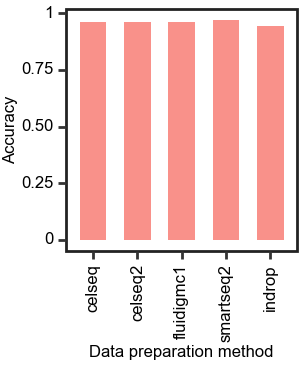

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1.5 x 1.83 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/panc8_accuarcy.pdf


In [27]:
#probabilities cutoff barplot
X=["celseq","celseq2","fluidigmc1","smartseq2","indrop"]
Y=[0.962,0.961,0.961,0.970,0.942]

import pandas as pd
from plotnine import *

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

data=pd.DataFrame(dict(Probabilities=X,Proportion=Y)) 
data['Probabilities'] = pd.Categorical(data.Probabilities, categories=pd.unique(data.Probabilities))  #reorder legend

print(data)
p1 = (ggplot()
        +geom_bar(data,aes(x="Probabilities",y = "Proportion"),stat="identity",width=0.6,fill=c1,alpha=0.8)
        
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            axis_text_x=element_text(rotation=90, hjust=0.5),
            figure_size=[1.5,1.83],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.60,0.4),
            legend_key_size=4) #change legend text font size
        +labs(x = "Data preparation method", y ="Accuracy")
        +guides(color = guide_legend(title = "Probability cutoff"))

)
print(p1)
p1.save('figure/panc8_accuarcy.pdf')